### Open in Qiime2 Environment!
#### This one was opened in qiime2-2023.2

In [3]:
!qiime feature-table filter-samples \
    --i-table ../data/Microbiome/pool_filtered_pergenome/3000_filt_ft.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --p-where "[keep]='TRUE'" \
    --o-filtered-table ../data/Microbiome/pool_filtered_pergenome/indvRPCA/3000_NOtransORltfu.qza
#take raw table and filter out transition and LTFU timepoints

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/3000_NOtransORltfu.qza


In [4]:
import subprocess

In [2]:
marmoset_ids = ["asami_beryl", "ellen_mac", "gadget_kirk", "johnny_rene", 
                "martina_abel", "reba_chrome", "tammy_bane", "kenny_toph"]

In [74]:
#filter for all 1month pre and 1 month post for each of the individual pairs


for marmoset_id in marmoset_ids:

    # Get the output file name
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_prepost.qza"

    # Get the subset name
    subset_select = f"[marmoset_id]=\'{marmoset_id}\'"
    subset_select2 = f"\"{subset_select}\""

    # Run the bash command
    command = """
        qiime feature-table filter-samples \
            --i-table ../data/Microbiome/pool_filtered_pergenome/indvRPCA/3000_NOtransORltfu.qza \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-where {subset_select2} \
            --o-filtered-table {output_file_name}
    """.format(subset_select2=subset_select2, output_file_name=output_file_name)
    subprocess.run(command, shell=True)

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/reba_chrome_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_prepost.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_prepost.qza


In [79]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_prepost.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_prepost_gemelli_filt.qza"

    # Run the bash command
    command = f"""
        qiime feature-table filter-features \
            --i-table {input_file_name} \
            --p-min-frequency 100 \
            --p-min-samples 6 \
            --o-filtered-table {output_file_name}
    """
    subprocess.run(command, shell=True)
#minimum of 100 reads accross all samples, gets rid of super rare features
#should be a total of 7 or 8 samples, needs to be in most of samples, set to 6

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/reba_chrome_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_prepost_gemelli_filt.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_prepost_gemelli_filt.qza


In [80]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_prepost_gemelli_filt.qza"
    output_file_name1 = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_ordination.qza"
    output_file_name2 = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_distance.qza"

    # Run the bash command
    command = f"""
        qiime gemelli auto-rpca \
            --i-table {input_file_name} \
            --o-biplot {output_file_name1} \
            --o-distance-matrix {output_file_name2}
    """
    subprocess.run(command, shell=True)

Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbi

In [83]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_ordination.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_emp_biplot.qzv"

    # Run the bash command
    command = f"""
        qiime emperor biplot \
            --i-biplot {input_file_name} \
            --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
            --m-feature-metadata-file ../../shotgun_scripts/woltka_v2_taxonomy.qza \
            --p-number-of-features 10 \
            --o-visualization {output_file_name}
    """
    subprocess.run(command, shell=True)

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/reba_chrome_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_RPCA_emp_biplot.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_RPCA_emp_biplot.qzv


In [84]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name1 = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_ordination.qza"
    input_file_name2 = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_prepost_gemelli_filt.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_qurro.qzv"

    # Run the bash command
    command = f"""
        qiime qurro loading-plot \
            --i-ranks {input_file_name1} \
            --i-table {input_file_name2} \
            --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
            --m-feature-metadata-file ../../shotgun_scripts/woltka_v2_taxonomy.qza \
            --o-visualization {output_file_name}
    """
    subprocess.run(command, shell=True)

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/reba_chrome_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_RPCA_qurro.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_RPCA_qurro.qzv


In [5]:
###manual edits to output files made###

for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_ordination.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_ord"

    # Run the bash command
    command = f"""
        qiime tools export \
            --input-path {input_file_name} \
            --output-path {output_file_name}
    """
    subprocess.run(command, shell=True)

Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_RPCA_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_per

## Log Ratios - top and bottom 5%

In [7]:
import pandas as pd

In [87]:
ellen_mac_LR = pd.read_csv("../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_5perc_selected_features.tsv", sep='\t')
gadget_kirk_LR = pd.read_csv("../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_5perc_selected_features.tsv", sep='\t')
martina_abel_LR = pd.read_csv("../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_1perc_selected_features.tsv", sep='\t')
reba_chrome_LR = pd.read_csv("../data/Microbiome/pool_filtered_pergenome/indvRPCA/reba_chrome_5perc_selected_features.tsv", sep='\t')
tammy_bane_LR = pd.read_csv("../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_5perc_selected_features.tsv", sep='\t')
kenny_toph_LR = pd.read_csv("../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_1perc_selected_features.tsv", sep='\t')
#Exclude AB (asami_beryl) and JR (johnny_rene) from comparison, since they were exposed to gel earlier

In [88]:
ellen_mac_LR.head()

Feature ID Log_Ratio_Classification
0  G000250875              Denominator
1  G000411515              Denominator
2  G008698165              Denominator
3  G000432615              Denominator
4  G004561455              Denominator

In [89]:
EM = set(ellen_mac_LR["Feature ID"].values)
GK = set(gadget_kirk_LR["Feature ID"].values)
MA = set(martina_abel_LR["Feature ID"].values)
RC = set(reba_chrome_LR["Feature ID"].values)
TB = set(tammy_bane_LR["Feature ID"].values)
KT = set(kenny_toph_LR["Feature ID"].values)

In [91]:
len(EM)

42

In [93]:
overlap = set.intersection(EM, GK, MA, RC, TB, KT)
len(overlap)
#sad, nothing overlaps with everything

0

In [94]:
overlap = set.intersection(EM, GK, RC, TB)
len(overlap)
#sad, nothing completely overlaps with the key groups (MA and KT were less straight forward)

0

In [95]:
overlap = set.intersection(EM, TB)
len(overlap)

8

In [99]:
marm_concat = pd.concat([ellen_mac_LR, gadget_kirk_LR, martina_abel_LR, reba_chrome_LR, 
           tammy_bane_LR, kenny_toph_LR])
marm_concat2 = marm_concat.groupby('Feature ID').count()
marm_concat2.rename(columns={'Log_Ratio_Classification': 'overlap_count'}, inplace=True)
marm_concat2.head()

overlap_count
Feature ID               
G000006865              1
G000006925              2
G000008865              2
G000012005              2
G000012845              1

In [102]:
marm_concat2.sort_values(by='overlap_count', ascending=False)

overlap_count
Feature ID               
G000434855              3
G000433375              3
G000438395              3
G012357415              3
G001915495              3
...                   ...
G000437995              1
G000437715              1
G000437535              1
G000436395              1
G902363425              1

[132 rows x 1 columns]

In [104]:
marm_concat2[marm_concat2.overlap_count >2]

overlap_count
Feature ID               
G000157935              3
G000433375              3
G000434855              3
G000436795              3
G000436855              3
G000438395              3
G001915495              3
G008273775              3
G012357415              3
G900128485              3

In [107]:
old_list = ['G000691685','G900095865','G000159155','G900066255','G000210635',
           'G000242235','G000250875','G000154305','G002160015','G000585355',
           'G900113155','G900091655','G000436135','G001318345','G000778805',
           'G000741165','G000434515','G002259685','G000519105']
old_set = set(old_list)

In [108]:
old_set.intersection(set(marm_concat2.index))

{'G000250875', 'G000434515', 'G000519105', 'G000585355'}

In [111]:
metadata = pd.read_csv("../data/Microbiome/14577_fixed.txt", sep='\t', index_col=0)
metadata.head()

Pre_Post collection_timepoint   keep collection_timestamp  \
sample_name                                                               
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 Post  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 Post  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   

              date_collected  description          diet  elevation  \
sample_name                                                          
14577.AB.TP1          6/2/21          NaN  gelandpellet        193   
14577.AB.TP10        4/14/22          NaN           gel        193   
14577.AB.TP11        7/11/22          NaN           gel        193   
14577.AB.TP2          6/3/21          NaN  gelandpellet        193   
14577.AB.TP3          6/8/21          NaN  gelandpellet        193   

              elevation_units           empo_1  ...    scientific_name  \
sample_name                                     ...                      
14577.AB.TP1           meters  Host-associated  ...  primatemetagenome   
14577.AB.TP10          meters  Host-associated  ...  primatemetagenome   
14577.AB.TP11          meters  Host-associated  ...  primatemetagenome   
14577.AB.TP2           meters  Host-associated  ...  primatemetagenome   
14577.AB.TP3           meters  Host-associated  ...  primatemetagenome   

                         sex sex_of_pair         site taxon_id  \
sample_name                                                      
14577.AB.TP1   notapplicable          MF  EliottField  1441288   
14577.AB.TP10  notapplicable          MF  EliottField  1441288   
14577.AB.TP11  notapplicable          MF  EliottField  1441288   
14577.AB.TP2   notapplicable          MF  EliottField  1441288   
14577.AB.TP3   notapplicable          MF  EliottField  1441288   

                        time_collected timepoint_group  \
sample_name                                              
14577.AB.TP1   lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP10  lightsontonoon(ZT0-ZT6)            TP10   
14577.AB.TP11  lightsontonoon(ZT0-ZT6)            TP11   
14577.AB.TP2   lightsontonoon(ZT0-ZT6)             TP2   
14577.AB.TP3   lightsontonoon(ZT0-ZT6)             TP3   

                                               title    tube_id  \
sample_name                                                       
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.AB.TP10  MarmosetDietChange-ACPResidentProject  363243336   
14577.AB.TP11  MarmosetDietChange-ACPResidentProject  363243344   
14577.AB.TP2   MarmosetDietChange-ACPResidentProject  363243257   
14577.AB.TP3   MarmosetDietChange-ACPResidentProject  363243266   

              timepoint_number  
sample_name                     
14577.AB.TP1                 1  
14577.AB.TP10               10  
14577.AB.TP11               11  
14577.AB.TP2                 2  
14577.AB.TP3                 3  

[5 rows x 54 columns]

In [130]:
Attempt1 = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/sample_plot_data_Akk_v_all4overlap.tsv', sep='\t')
Attempt1.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number group  \
0  14577.EM.TP1                        NaN                 1   Pre   
1  14577.GK.TP1                  -5.717028                 1   Pre   
2  14577.AB.TP1                  -5.488938                 1   Pre   
3  14577.JR.TP1                  -2.172619                 1   Pre   
4  14577.MA.TP1                  -5.679319                 1   Pre   

    marmoset_id  
0     ellen_mac  
1   gadget_kirk  
2   asami_beryl  
3   johnny_rene  
4  martina_abel

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

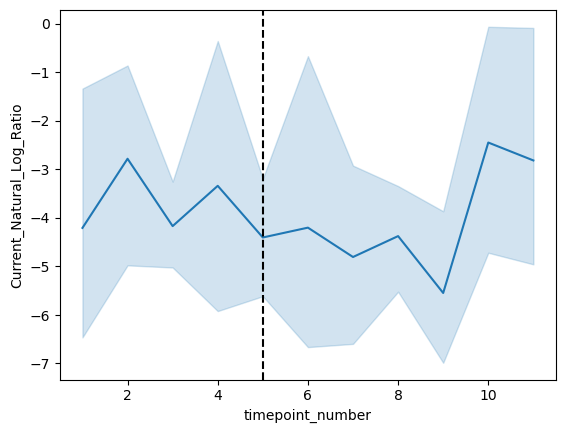

In [131]:
g = sns.lineplot(data=Attempt1, x='timepoint_number', y='Current_Natural_Log_Ratio')
plt.axvline(5, linestyle='--', color='k')
#overall trend line

In [169]:
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

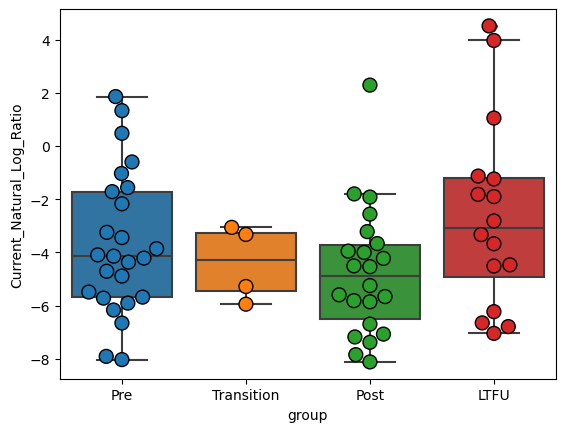

In [151]:
g = sns.boxplot(data=Attempt1, x='group', y='Current_Natural_Log_Ratio')
g = sns.swarmplot(data=Attempt1, x='group', y='Current_Natural_Log_Ratio',
                 size=10, edgecolor='k', linewidth=1)
#overall trends
#maybe two groups upper and lower?

In [179]:
x = Attempt1[Attempt1['group']=='Pre'].Current_Natural_Log_Ratio.values
y = Attempt1[Attempt1['group']=='Post'].Current_Natural_Log_Ratio.values
res = mannwhitneyu(x, y, nan_policy='omit')
res

MannwhitneyuResult(statistic=339.0, pvalue=0.17579235970651041)

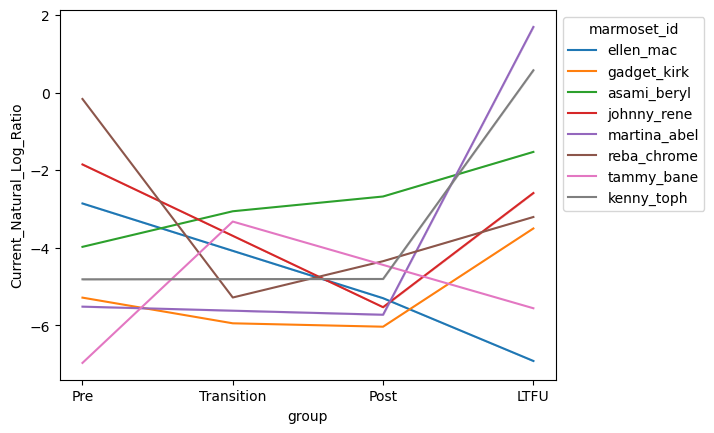

In [152]:
g = sns.lineplot(data=Attempt1, x='group', y='Current_Natural_Log_Ratio',
                 hue='marmoset_id', ci=0)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#average for each stage

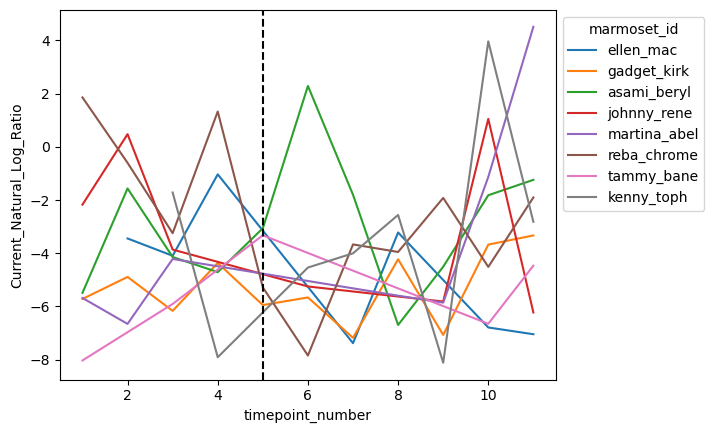

In [132]:
g = sns.lineplot(data=Attempt1, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue='marmoset_id')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.axvline(5, linestyle='--', color='k')
#asami_beryl and johnny_rene started gel early

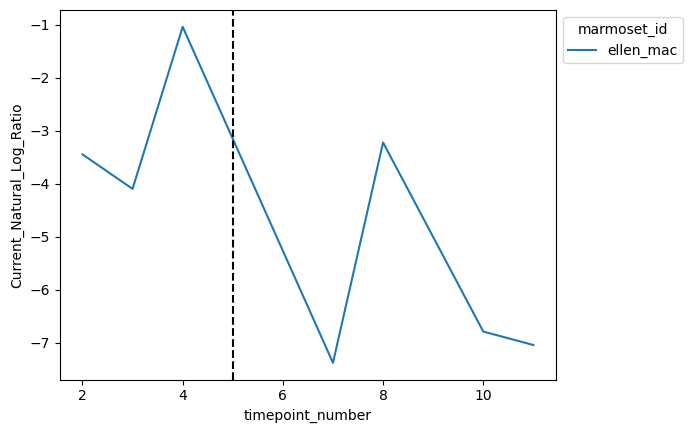

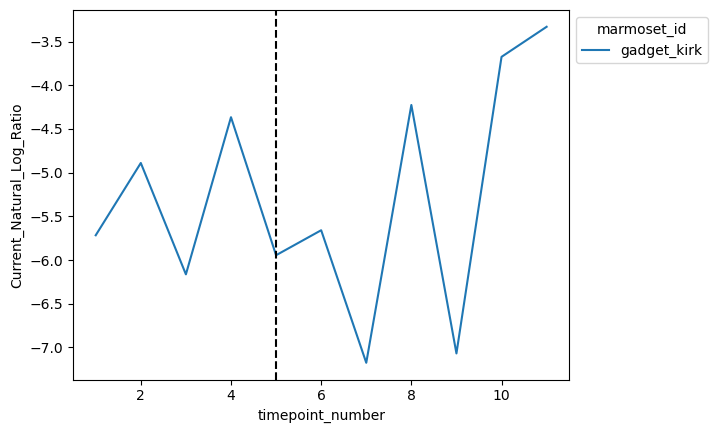

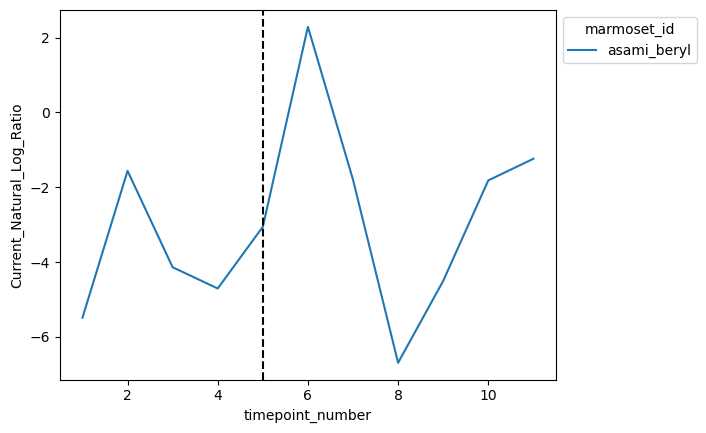

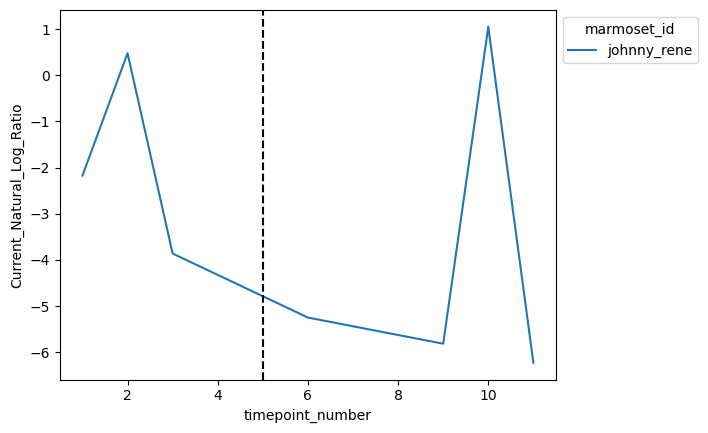

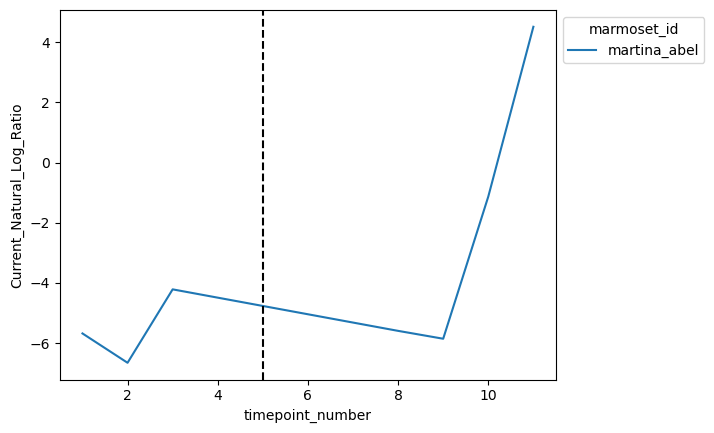

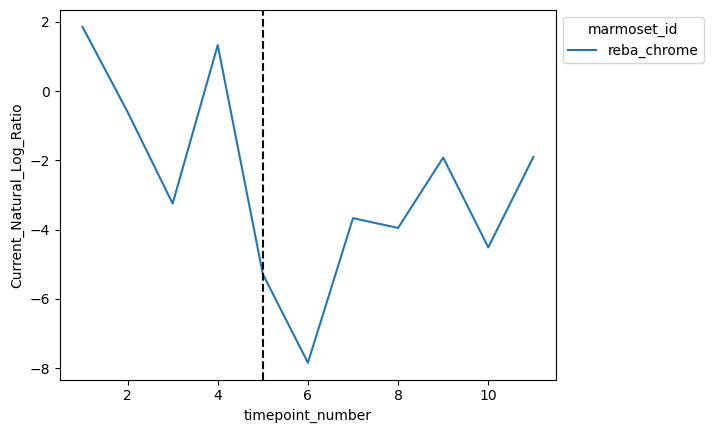

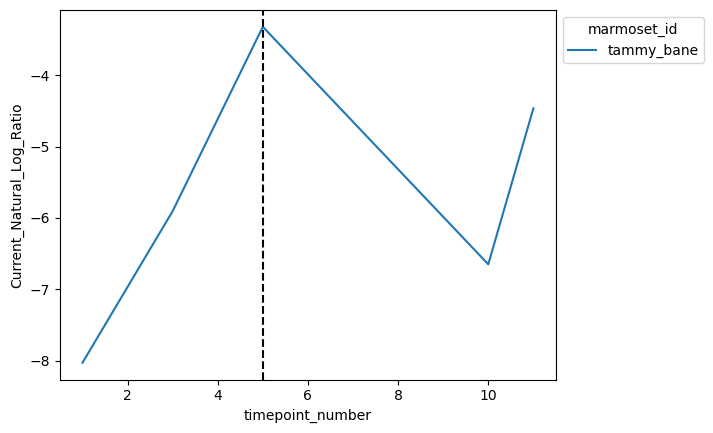

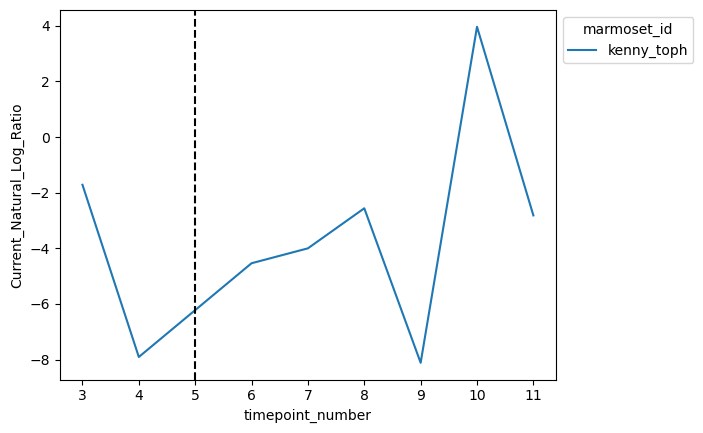

In [149]:
for mx in Attempt1.marmoset_id.unique():
    g = sns.lineplot(data=Attempt1[Attempt1['marmoset_id']== mx], 
                     x='timepoint_number', y='Current_Natural_Log_Ratio', 
                     hue='marmoset_id')
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    plt.axvline(5, linestyle='--', color='k')
    plt.show()
#asami_beryl and johnny_rene started gel early

In [133]:
Attempt2 = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/sample_plot_data_1v4overlap.tsv', sep='\t')
Attempt2.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number group  \
0  14577.EM.TP1                   1.867520                 1   Pre   
1  14577.GK.TP1                   3.416029                 1   Pre   
2  14577.AB.TP1                   2.988812                 1   Pre   
3  14577.JR.TP1                   3.667218                 1   Pre   
4  14577.MA.TP1                  -2.415728                 1   Pre   

    marmoset_id  
0     ellen_mac  
1   gadget_kirk  
2   asami_beryl  
3   johnny_rene  
4  martina_abel

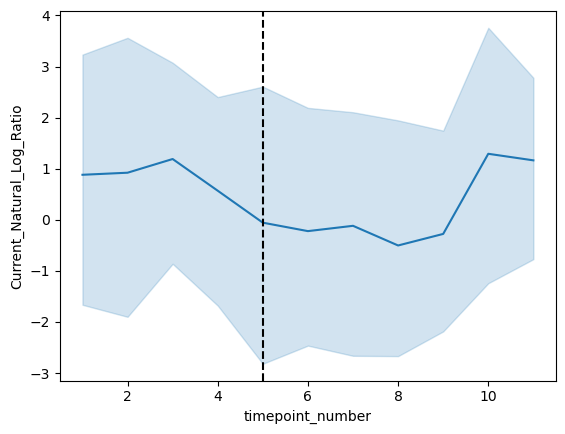

In [134]:
g = sns.lineplot(data=Attempt2, x='timepoint_number', y='Current_Natural_Log_Ratio')
plt.axvline(5, linestyle='--', color='k')
#overall trend line

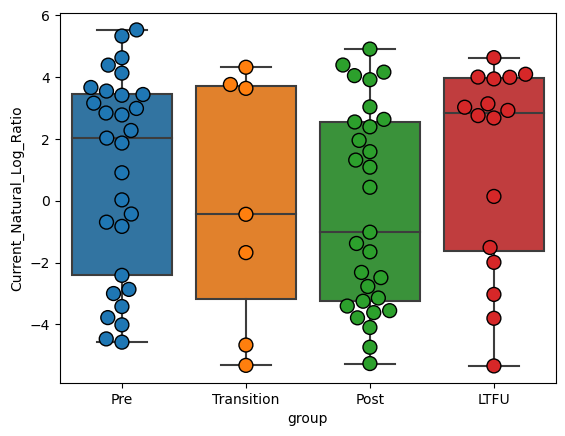

In [148]:
g = sns.boxplot(data=Attempt2, x='group', y='Current_Natural_Log_Ratio')
g = sns.swarmplot(data=Attempt2, x='group', y='Current_Natural_Log_Ratio',
                 size=10, edgecolor='k', linewidth=1)
#overall trends
#maybe two groups upper and lower?

In [176]:
x = Attempt2[Attempt2['group']=='Pre'].Current_Natural_Log_Ratio.values
y = Attempt2[Attempt2['group']=='Post'].Current_Natural_Log_Ratio.values
res = mannwhitneyu(x, y, nan_policy='omit')
res

MannwhitneyuResult(statistic=509.0, pvalue=0.17115119667688694)

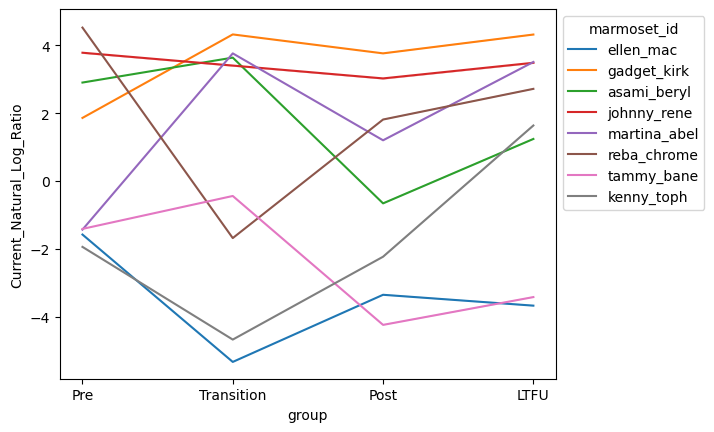

In [154]:
g = sns.lineplot(data=Attempt2, x='group', y='Current_Natural_Log_Ratio',
                 hue='marmoset_id', ci=0)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#average for each stage

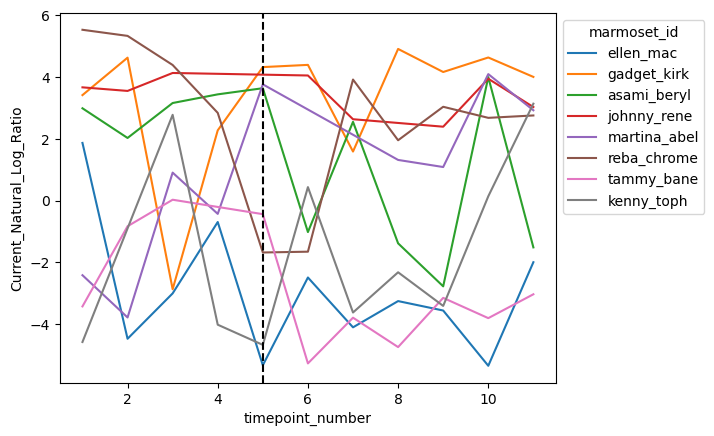

In [127]:
g = sns.lineplot(data=Attempt2, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue='marmoset_id')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.axvline(5, linestyle='--', color='k')
#asami_beryl and johnny_rene started gel early

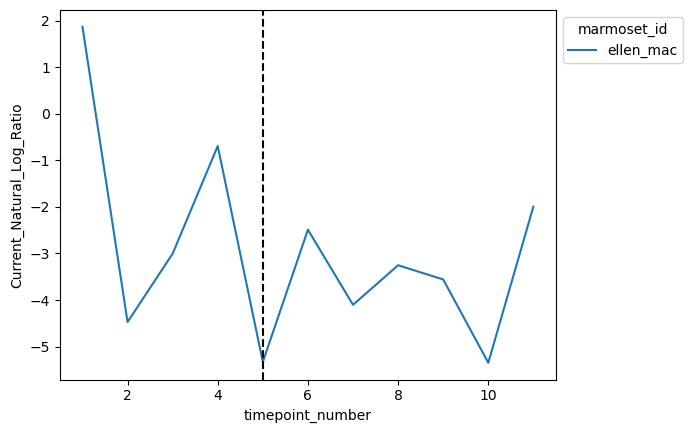

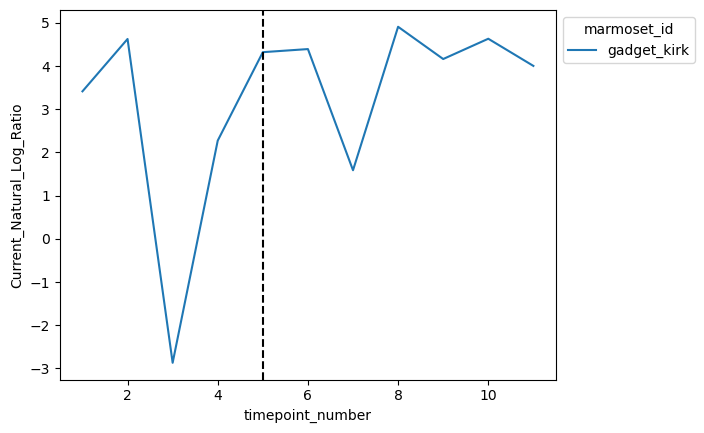

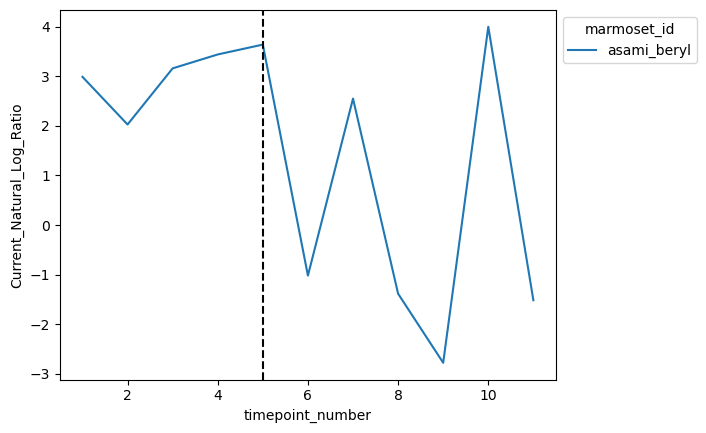

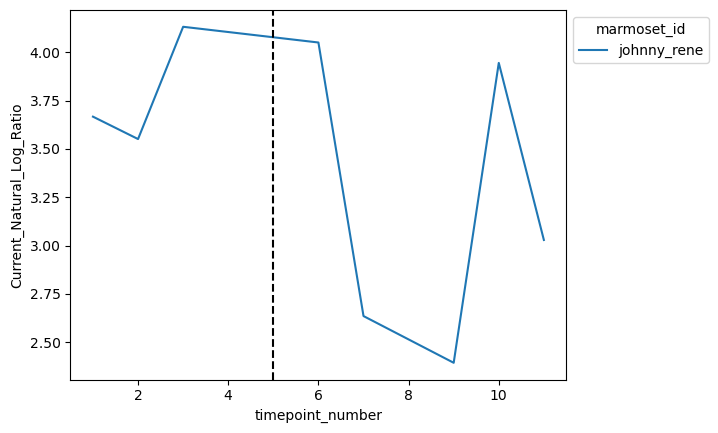

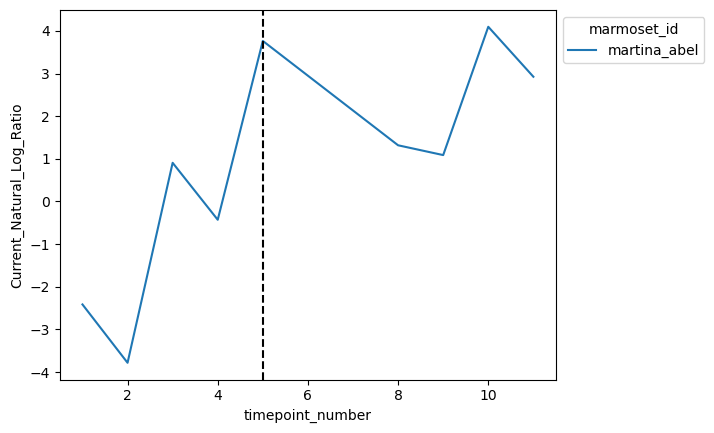

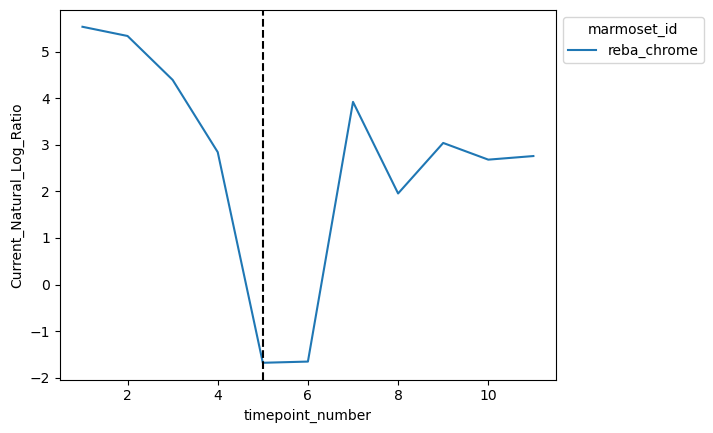

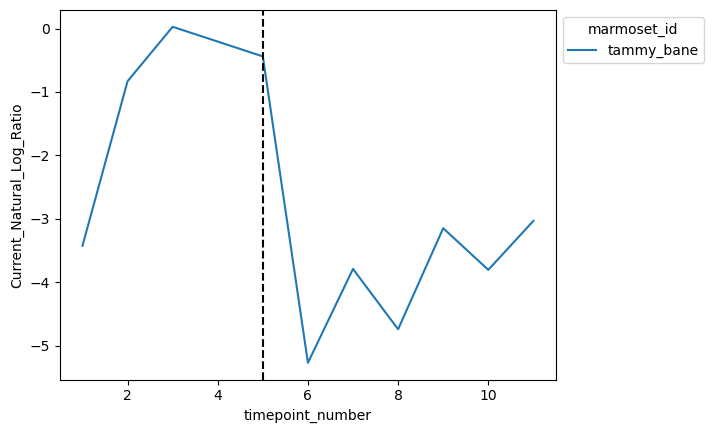

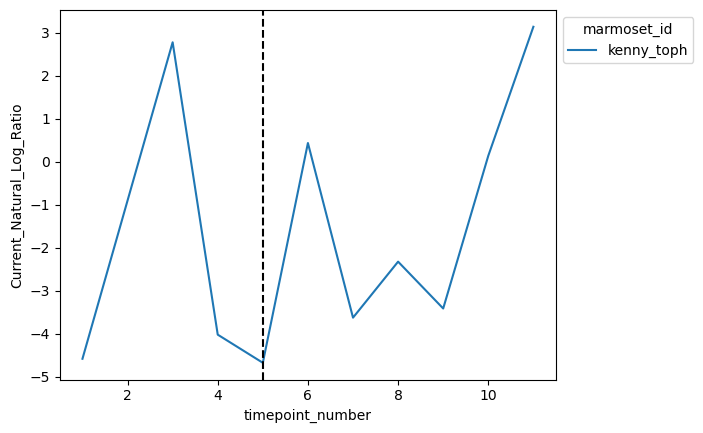

In [150]:
for mx in Attempt2.marmoset_id.unique():
    g = sns.lineplot(data=Attempt2[Attempt2['marmoset_id']== mx], 
                     x='timepoint_number', y='Current_Natural_Log_Ratio', 
                     hue='marmoset_id')
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    plt.axvline(5, linestyle='--', color='k')
    plt.show()
#asami_beryl and johnny_rene started gel early

In [159]:
Attempt3 = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/sample_plot_data_top5overlap_bothBacteroides.tsv', sep='\t')
Attempt3.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number group  \
0  14577.EM.TP1                   2.731242                 1   Pre   
1  14577.GK.TP1                   5.168162                 1   Pre   
2  14577.AB.TP1                   5.146233                 1   Pre   
3  14577.JR.TP1                   3.304995                 1   Pre   
4  14577.MA.TP1                  -2.560153                 1   Pre   

    marmoset_id  
0     ellen_mac  
1   gadget_kirk  
2   asami_beryl  
3   johnny_rene  
4  martina_abel

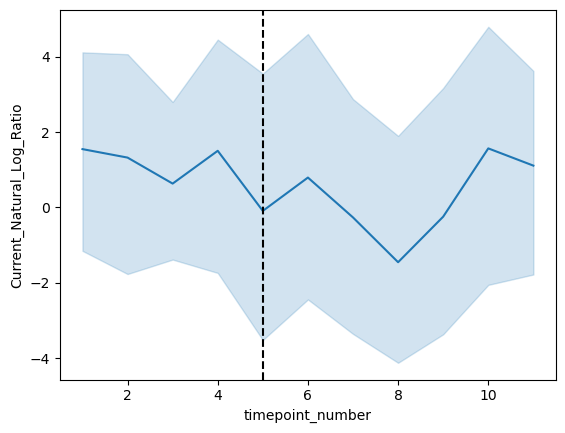

In [160]:
g = sns.lineplot(data=Attempt3, x='timepoint_number', y='Current_Natural_Log_Ratio')
plt.axvline(5, linestyle='--', color='k')
#overall trend line

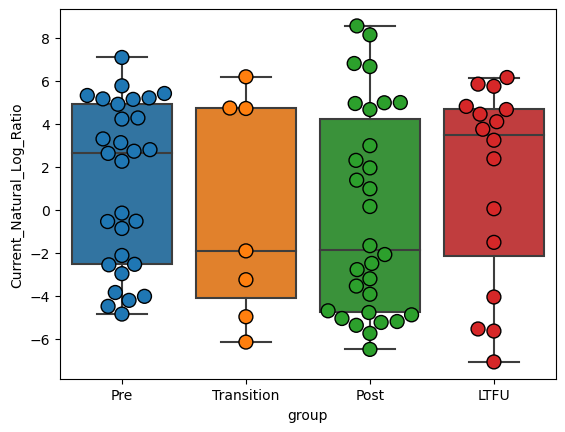

In [161]:
g = sns.boxplot(data=Attempt3, x='group', y='Current_Natural_Log_Ratio')
g = sns.swarmplot(data=Attempt3, x='group', y='Current_Natural_Log_Ratio',
                 size=10, edgecolor='k', linewidth=1)
#overall trends
#maybe two groups upper and lower?

In [170]:
x = Attempt3[Attempt3['group']=='Pre'].Current_Natural_Log_Ratio.values
y =Attempt3[Attempt3['group']=='Post'].Current_Natural_Log_Ratio.values
res = mannwhitneyu(x, y)
res

MannwhitneyuResult(statistic=538.0, pvalue=0.12016032927135753)

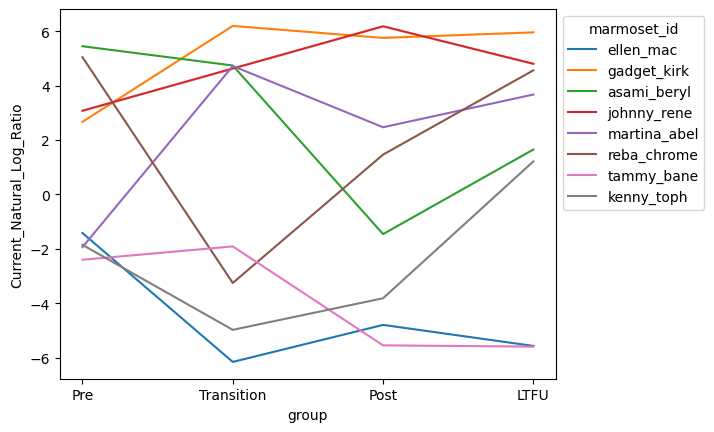

In [162]:
g = sns.lineplot(data=Attempt3, x='group', y='Current_Natural_Log_Ratio',
                 hue='marmoset_id', ci=0)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#average for each stage

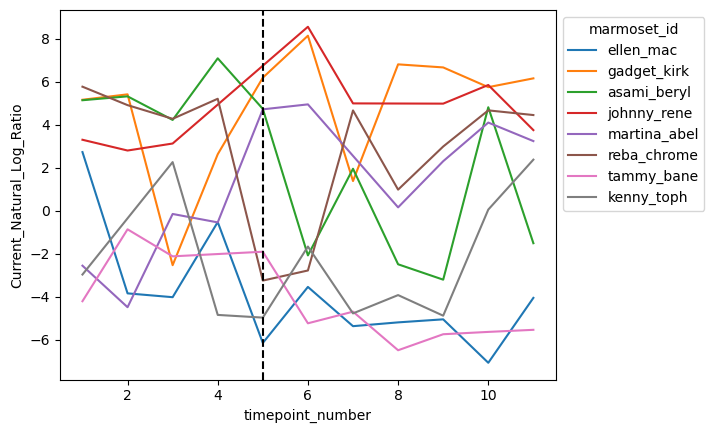

In [163]:
g = sns.lineplot(data=Attempt3, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue='marmoset_id')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.axvline(5, linestyle='--', color='k')
#asami_beryl and johnny_rene started gel early

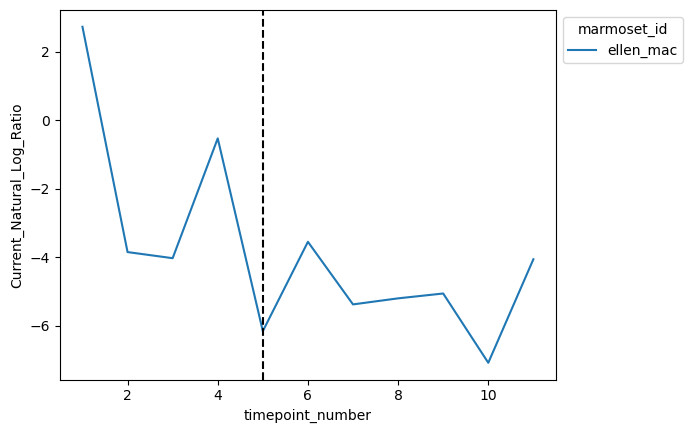

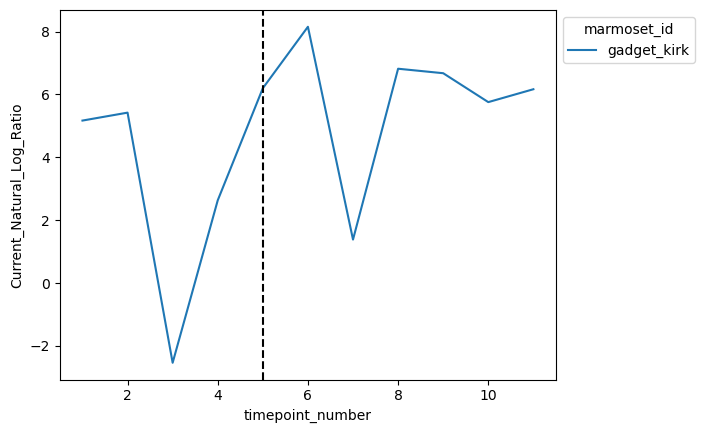

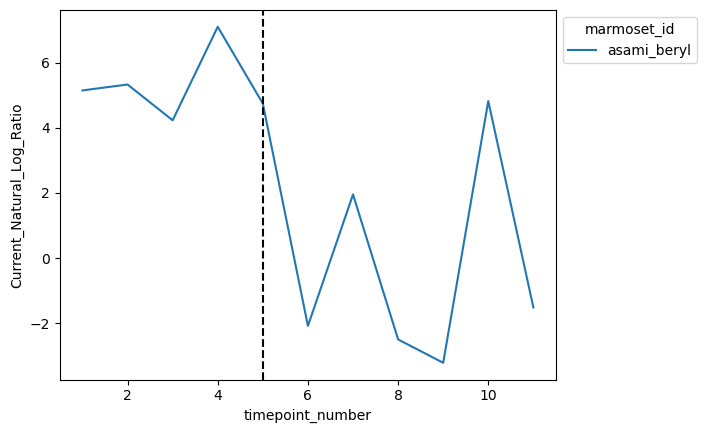

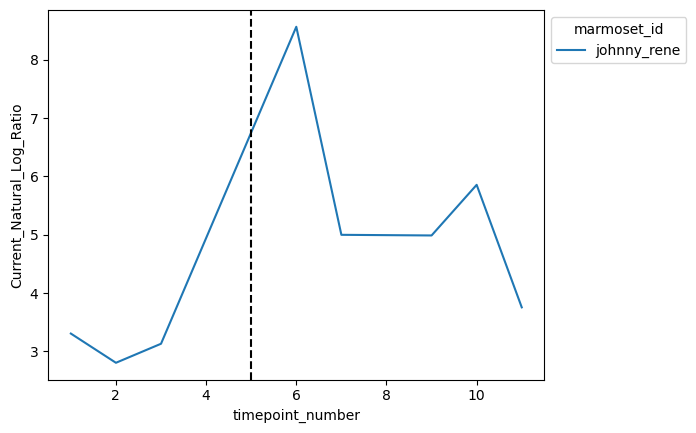

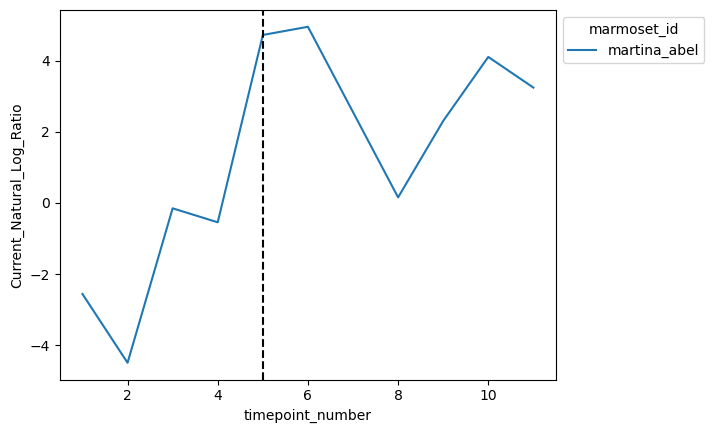

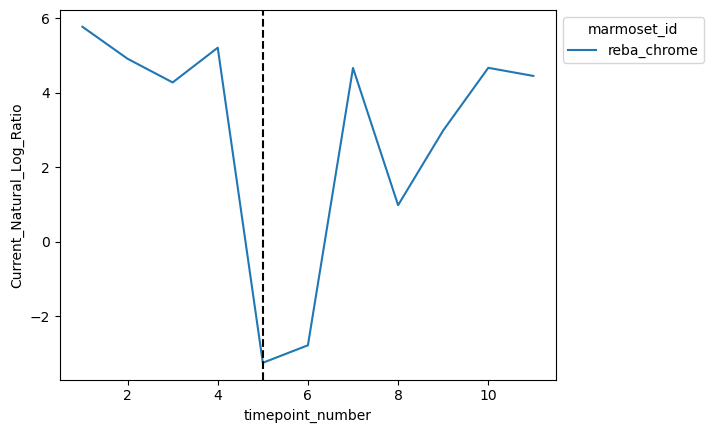

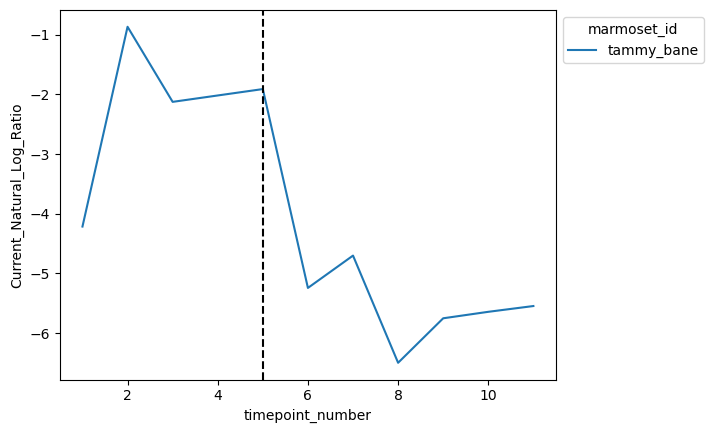

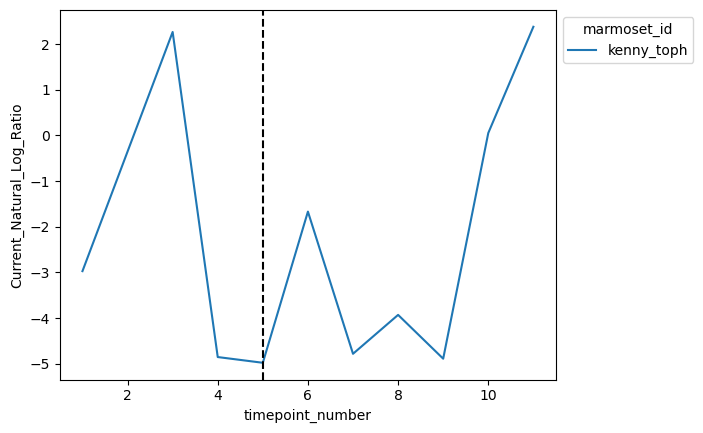

In [164]:
for mx in Attempt3.marmoset_id.unique():
    g = sns.lineplot(data=Attempt3[Attempt3['marmoset_id']== mx], 
                     x='timepoint_number', y='Current_Natural_Log_Ratio', 
                     hue='marmoset_id')
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    plt.axvline(5, linestyle='--', color='k')
    plt.show()
#asami_beryl and johnny_rene started gel early

## Individual RPCA PCoAs

In [ ]:
#need all TPs

In [36]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_all.qza"

    # Get the subset name
    subset_select = f"[marmoset_id]=\'{marmoset_id}\'"
    subset_select2 = f"\"{subset_select}\""

    # Run the bash command
    command = """
        qiime feature-table filter-samples \
            --i-table ../data/Microbiome/pool_filtered_pergenome/RPCA/gemelli_filtered.qza \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-where {subset_select2} \
            --o-filtered-table {output_file_name}
    """.format(subset_select2=subset_select2, output_file_name=output_file_name)
    subprocess.run(command, shell=True)

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/reba_chrome_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_all.qza


In [39]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_all.qza"
    output_file_name1 = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_all_ordination.qza"
    output_file_name2 = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_all_distance.qza"

    # Run the bash command
    command = f"""
        qiime gemelli auto-rpca \
            --i-table {input_file_name} \
            --o-biplot {output_file_name1} \
            --o-distance-matrix {output_file_name2}
    """
    subprocess.run(command, shell=True)

Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_all_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_all_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_all_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_all_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_all_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_all_distance.qza
Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_all_ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_all_distance.qza
Saved PCoAResults % Properti

In [40]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_all_ordination.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/indvRPCA/{marmoset_id}_RPCA_all_ord"

    # Run the bash command
    command = f"""
        qiime tools export \
            --input-path {input_file_name} \
            --output-path {output_file_name}
    """
    subprocess.run(command, shell=True)

Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_all_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_all_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_all_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_all_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_all_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/gadget_kirk_RPCA_all_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_all_ordination.qza as OrdinationDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_all_ord
Exported ../data/Microbiome/pool_filtered_pergenome/indvRPCA/martina_abel_RPCA_all_ordination.qza as OrdinationDirectoryFormat to directory 

In [9]:
metadata = pd.read_csv("../data/Microbiome/14577_fixed.txt", sep='\t', index_col=0)
metadata.head()

Pre_Post collection_timepoint   keep collection_timestamp  \
sample_name                                                               
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   

              date_collected  description          diet  elevation  \
sample_name                                                          
14577.AB.TP1          6/2/21          NaN  gelandpellet        193   
14577.AB.TP10        4/14/22          NaN           gel        193   
14577.AB.TP11        7/11/22          NaN           gel        193   
14577.AB.TP2          6/3/21          NaN  gelandpellet        193   
14577.AB.TP3          6/8/21          NaN  gelandpellet        193   

              elevation_units           empo_1  ...    scientific_name  \
sample_name                                     ...                      
14577.AB.TP1           meters  Host-associated  ...  primatemetagenome   
14577.AB.TP10          meters  Host-associated  ...  primatemetagenome   
14577.AB.TP11          meters  Host-associated  ...  primatemetagenome   
14577.AB.TP2           meters  Host-associated  ...  primatemetagenome   
14577.AB.TP3           meters  Host-associated  ...  primatemetagenome   

                         sex sex_of_pair         site taxon_id  \
sample_name                                                      
14577.AB.TP1   notapplicable          MF  EliottField  1441288   
14577.AB.TP10  notapplicable          MF  EliottField  1441288   
14577.AB.TP11  notapplicable          MF  EliottField  1441288   
14577.AB.TP2   notapplicable          MF  EliottField  1441288   
14577.AB.TP3   notapplicable          MF  EliottField  1441288   

                        time_collected timepoint_group  \
sample_name                                              
14577.AB.TP1   lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP10  lightsontonoon(ZT0-ZT6)            TP10   
14577.AB.TP11  lightsontonoon(ZT0-ZT6)            TP11   
14577.AB.TP2   lightsontonoon(ZT0-ZT6)             TP2   
14577.AB.TP3   lightsontonoon(ZT0-ZT6)             TP3   

                                               title    tube_id  \
sample_name                                                       
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.AB.TP10  MarmosetDietChange-ACPResidentProject  363243336   
14577.AB.TP11  MarmosetDietChange-ACPResidentProject  363243344   
14577.AB.TP2   MarmosetDietChange-ACPResidentProject  363243257   
14577.AB.TP3   MarmosetDietChange-ACPResidentProject  363243266   

              timepoint_number  
sample_name                     
14577.AB.TP1                 1  
14577.AB.TP10               10  
14577.AB.TP11               11  
14577.AB.TP2                 2  
14577.AB.TP3                 3  

[5 rows x 54 columns]

In [41]:
A_B = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/indvRPCA/asami_beryl_RPCA_all_ord/ordination_samps.txt', sep='\t', index_col=0)
E_M = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/indvRPCA/ellen_mac_RPCA_all_ord/ordination_samps.txt', sep='\t', index_col=0)
T_B = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_RPCA_all_ord/ordination_samps.txt', sep='\t', index_col=0)
K_T = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/indvRPCA/kenny_toph_RPCA_all_ord/ordination_samps.txt', sep='\t', index_col=0)
J_R = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/indvRPCA/johnny_rene_RPCA_all_ord/ordination_samps.txt', sep='\t', index_col=0)

In [42]:
A_B.head()

Axis1_66.3  Axis2_31.7  Axis3_2.0
Species                                         
14577.AB.TP1    -0.309471   -0.292833  -0.017843
14577.AB.TP2     0.330282   -0.618982  -0.077372
14577.AB.TP9     0.195901    0.140846  -0.157032
14577.AB.TP8     0.188850    0.300867  -0.264914
14577.AB.TP10   -0.062258   -0.048375  -0.389855

In [43]:
A_B_md = pd.merge(A_B, metadata, left_index=True, right_index=True)
E_M_md = pd.merge(E_M, metadata, left_index=True, right_index=True)
T_B_md = pd.merge(T_B, metadata, left_index=True, right_index=True)
K_T_md = pd.merge(K_T, metadata, left_index=True, right_index=True)
J_R_md = pd.merge(J_R, metadata, left_index=True, right_index=True)

In [44]:
A_B_md.head()

Axis1_66.3  Axis2_31.7  Axis3_2.0 Pre_Post  \
14577.AB.TP1    -0.309471   -0.292833  -0.017843      Pre   
14577.AB.TP2     0.330282   -0.618982  -0.077372      Pre   
14577.AB.TP9     0.195901    0.140846  -0.157032     Post   
14577.AB.TP8     0.188850    0.300867  -0.264914     Post   
14577.AB.TP10   -0.062258   -0.048375  -0.389855     Post   

              collection_timepoint   keep collection_timestamp date_collected  \
14577.AB.TP1                   Pre   True   6/2/202112:00:00PM         6/2/21   
14577.AB.TP2                   Pre   True   6/3/202112:00:00PM         6/3/21   
14577.AB.TP9                  Post   True  7/19/202112:00:00PM        7/19/21   
14577.AB.TP8                  Post   True   7/9/202112:00:00PM         7/9/21   
14577.AB.TP10                 LTFU  False  4/14/202212:00:00PM        4/14/22   

               description          diet  ...    scientific_name  \
14577.AB.TP1           NaN  gelandpellet  ...  primatemetagenome   
14577.AB.TP2           NaN  gelandpellet  ...  primatemetagenome   
14577.AB.TP9           NaN           gel  ...  primatemetagenome   
14577.AB.TP8           NaN           gel  ...  primatemetagenome   
14577.AB.TP10          NaN           gel  ...  primatemetagenome   

                         sex sex_of_pair         site taxon_id  \
14577.AB.TP1   notapplicable          MF  EliottField  1441288   
14577.AB.TP2   notapplicable          MF  EliottField  1441288   
14577.AB.TP9   notapplicable          MF  EliottField  1441288   
14577.AB.TP8   notapplicable          MF  EliottField  1441288   
14577.AB.TP10  notapplicable          MF  EliottField  1441288   

                        time_collected timepoint_group  \
14577.AB.TP1   lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP2   lightsontonoon(ZT0-ZT6)             TP2   
14577.AB.TP9   lightsontonoon(ZT0-ZT6)             TP9   
14577.AB.TP8   lightsontonoon(ZT0-ZT6)             TP8   
14577.AB.TP10  lightsontonoon(ZT0-ZT6)            TP10   

                                               title    tube_id  \
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.AB.TP2   MarmosetDietChange-ACPResidentProject  363243257   
14577.AB.TP9   MarmosetDietChange-ACPResidentProject  363243304   
14577.AB.TP8   MarmosetDietChange-ACPResidentProject  363243311   
14577.AB.TP10  MarmosetDietChange-ACPResidentProject  363243336   

              timepoint_number  
14577.AB.TP1                 1  
14577.AB.TP2                 2  
14577.AB.TP9                 9  
14577.AB.TP8                 8  
14577.AB.TP10               10  

[5 rows x 57 columns]

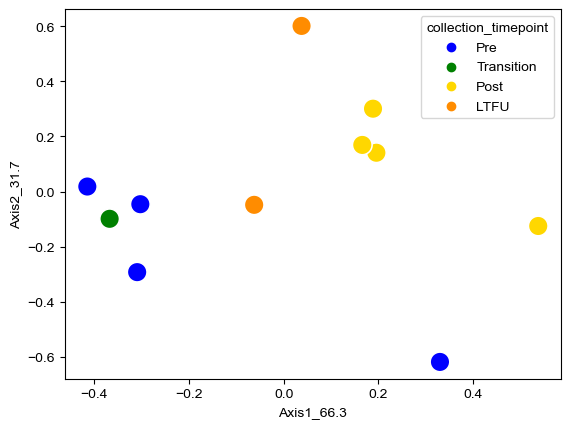

In [46]:
g = sns.scatterplot(data=A_B_md, x='Axis1_66.3', y='Axis2_31.7', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/AB_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

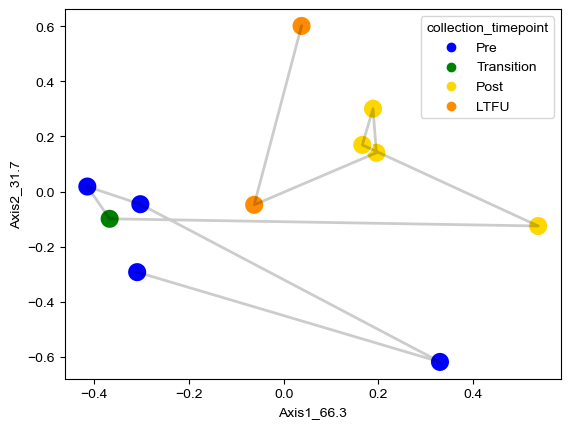

In [71]:
g = sns.scatterplot(data=A_B_md, x='Axis1_66.3', y='Axis2_31.7', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

A_B_md.timepoint_number = A_B_md.timepoint_number.astype(float)
A_B_md2 = A_B_md.sort_values('timepoint_number', ascending=True)
plt.plot(A_B_md2['Axis1_66.3'], A_B_md2['Axis2_31.7'], color='black', lw=2, alpha=0.2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/AB_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

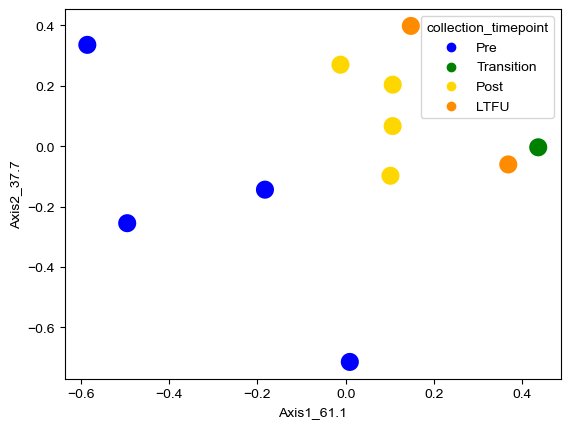

In [51]:
g = sns.scatterplot(data=E_M_md, x='Axis1_61.1', y='Axis2_37.7', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/EM_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

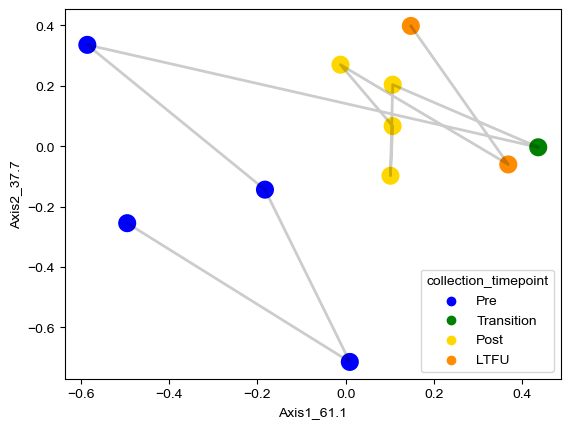

In [72]:
g = sns.scatterplot(data=E_M_md, x='Axis1_61.1', y='Axis2_37.7', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

E_M_md.timepoint_number = E_M_md.timepoint_number.astype(float)
E_M_md2 = E_M_md.sort_values('timepoint_number', ascending=True)
plt.plot(E_M_md2['Axis1_61.1'], E_M_md2['Axis2_37.7'], color='black', lw=2, alpha=0.2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/EM_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

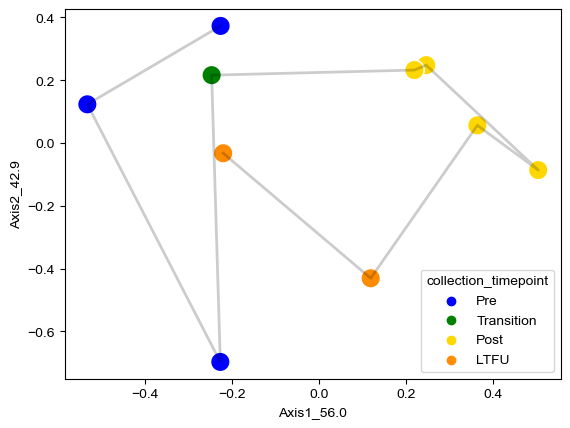

In [70]:
g = sns.scatterplot(data=T_B_md, x='Axis1_56.0', y='Axis2_42.9', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

T_B_md.timepoint_number = T_B_md.timepoint_number.astype(float)
T_B_md2 = T_B_md.sort_values('timepoint_number', ascending=True)
plt.plot(T_B_md2['Axis1_56.0'], T_B_md2['Axis2_42.9'], color='black', lw=2, alpha=0.2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/TB_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

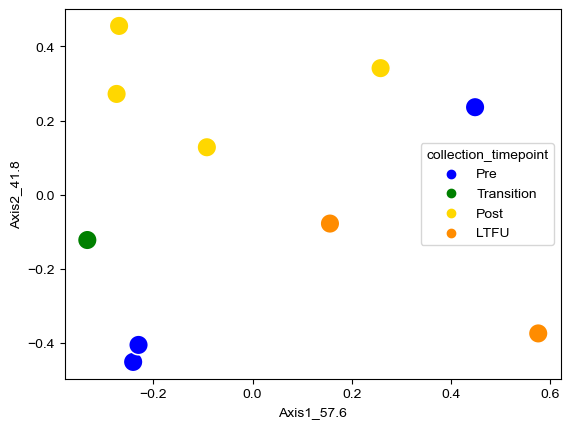

In [74]:
g = sns.scatterplot(data=K_T_md, x='Axis1_57.6', y='Axis2_41.8', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/KT_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

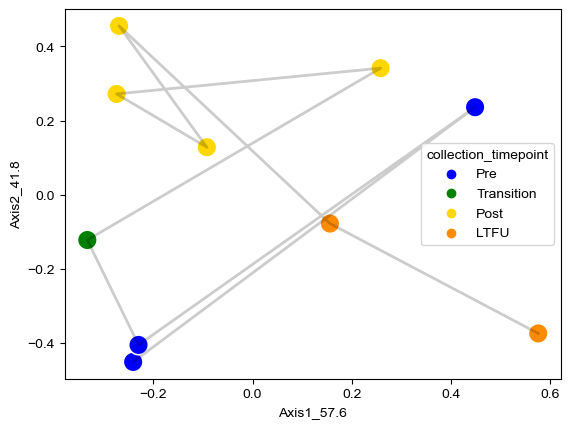

In [75]:
g = sns.scatterplot(data=K_T_md, x='Axis1_57.6', y='Axis2_41.8', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

K_T_md.timepoint_number = K_T_md.timepoint_number.astype(float)
K_T_md2 = K_T_md.sort_values('timepoint_number', ascending=True)
plt.plot(K_T_md2['Axis1_57.6'], K_T_md2['Axis2_41.8'], color='black', lw=2, alpha=0.2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/KT_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

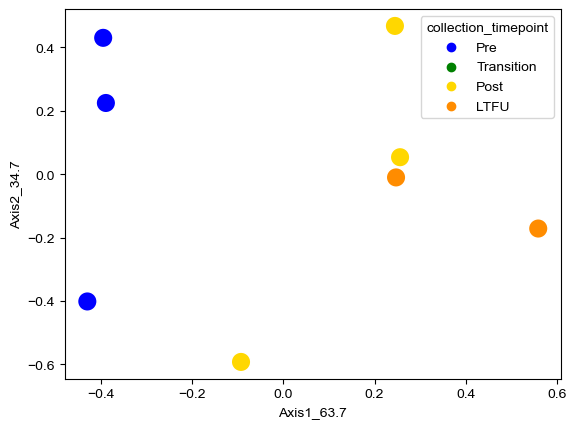

In [54]:
g = sns.scatterplot(data=J_R_md, x='Axis1_63.7', y='Axis2_34.7', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/JR_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

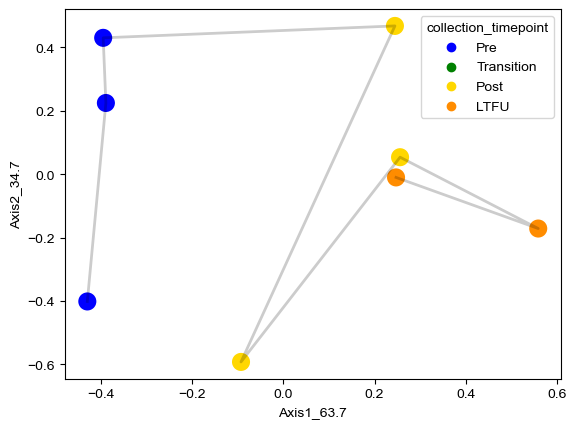

In [76]:
g = sns.scatterplot(data=J_R_md, x='Axis1_63.7', y='Axis2_34.7', 
                    hue='collection_timepoint', s=200,
                    hue_order=['Pre', 'Transition', 'Post', 'LTFU'],
                   palette=['blue', 'green', 'gold', 'darkorange'])

J_R_md.timepoint_number = J_R_md.timepoint_number.astype(float)
J_R_md2 = J_R_md.sort_values('timepoint_number', ascending=True)
plt.plot(J_R_md2['Axis1_63.7'], J_R_md2['Axis2_34.7'], color='black', lw=2, alpha=0.2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/JR_RPCA_indv_scatter.svg', bbox_inches='tight', dpi=150)

## Longitudinal - LME

In [149]:
OGU_list = ['G000157935', 'G000250875', 'G000433375', 'G000434515', 'G000434855',
            'G000436795', 'G000436855', 'G000438395', 'G000519105', 'G000585355', 
            'G001915495', 'G900128485']
#top/bottom 5% features, overlapping OGU between most marmosets

In [157]:
!qiime longitudinal linear-mixed-effects \
            --i-table ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/rarefied_relative_frequency_table.qza \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-state-column timepoint_number \
            --p-individual-id-column marmoset_id \
            --p-metric G000157935 \
            --p-group-columns Pre_Post \
            --p-random-effects tube_id \
            --o-visualization ../data/Microbiome/pool_filtered_pergenome/LME_allmarm_G000157935.qzv
#G000157935 = Prevotella copri

Plugin error from longitudinal:

  index 74 is out of bounds for axis 0 with size 74

Debug info has been saved to /var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/qiime2-q2cli-err-jnqabg6n.log


In [ ]:
for category in OGU_list:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/rarefied_relative_frequency_table.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/LME_allmarm_{category}.qzv"

    # Run the bash command
    command = f"""
        qiime longitudinal linear-mixed-effects \
            --i-table {input_file_name} \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-state-column timepoint_number \
            --p-individual-id-column marmoset_id \
            --p-metric {category} \
            --p-group-columns collection_timepoint,diet,Pre_Post \
            --p-random-effects tube_id,longitude \
            --o-visualization {output_file_name}
    """
    subprocess.run(command, shell=True)
#metric column can me in metadata or table but needs to be numeric
#for all marmosets

In [172]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf

In [162]:
rar_rel_freq = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/rarefied_relative_frequency_table.tsv',
                          sep='\t', skiprows=1, index_col=0)
rar_rel_freq.head()

14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  \
#OTU ID                                                              
G000006605      0.000000      0.000000      0.000000           0.0   
G000006745      0.000000      0.000000      0.000006           0.0   
G000006785      0.000000      0.000000      0.000000           0.0   
G000006845      0.000006      0.000000      0.000000           0.0   
G000006865      0.000144      0.000024      0.000611           0.0   

            14577.MA.TP11  14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  \
#OTU ID                                                               
G000006605       0.000000       0.00000      0.000000           0.0   
G000006745       0.000000       0.00000      0.000000           0.0   
G000006785       0.000012       0.00000      0.000000           0.0   
G000006845       0.000018       0.00000      0.000000           0.0   
G000006865       0.000162       0.00021      0.000012           0.0   

            14577.TK.TP1  14577.GK.TP4  ...  14577.EM.TP4  14577.JR.TP3  \
#OTU ID                                 ...                               
G000006605      0.000000      0.000000  ...      0.000012      0.000000   
G000006745      0.000000      0.000012  ...      0.000012      0.000000   
G000006785      0.000000      0.000000  ...      0.000006      0.000000   
G000006845      0.000000      0.000000  ...      0.000000      0.000006   
G000006865      0.000018      0.000048  ...      0.000000      0.000006   

            14577.AB.TP3  14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  \
#OTU ID                                                              
G000006605      0.000006      0.000000      0.000000      0.000000   
G000006745      0.000006      0.000000      0.000000      0.000000   
G000006785      0.000000      0.000000      0.000000      0.000000   
G000006845      0.000000      0.000000      0.000000      0.000000   
G000006865      0.000006      0.000012      0.000228      0.000006   

            14577.AB.TP4  14577.GK.TP6  14577.RC.TP7  14577.TB.TP5  
#OTU ID                                                             
G000006605      0.000000      0.000000      0.000000      0.000000  
G000006745      0.000000      0.000000      0.000000      0.000000  
G000006785      0.000000      0.000000      0.000000      0.000000  
G000006845      0.000000      0.000006      0.000000      0.000000  
G000006865      0.000012      0.006749      0.000353      0.000138  

[5 rows x 81 columns]

In [168]:
rrf_OGUlist = rar_rel_freq[rar_rel_freq.index.isin(OGU_list)].copy()
rrf_OGUlist.head()

14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  \
#OTU ID                                                              
G000157935      0.002048      0.000198      0.000359      0.000479   
G000250875      0.000180      0.000024      0.000048      0.000012   
G000433375      0.000156      0.004425      0.000862      0.003683   
G000434515      0.000024      0.000000      0.000000      0.000006   
G000434855      0.013749      0.012293      0.002485      0.000635   

            14577.MA.TP11  14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  \
#OTU ID                                                               
G000157935       0.000479      0.095731      0.000138      0.364449   
G000250875       0.000006      0.000012      0.000000      0.000006   
G000433375       0.001096      0.000844      0.012060      0.000647   
G000434515       0.000012      0.001305      0.000000      0.005401   
G000434855       0.000377      0.001180      0.000940      0.000168   

            14577.TK.TP1  14577.GK.TP4  ...  14577.EM.TP4  14577.JR.TP3  \
#OTU ID                                 ...                               
G000157935      0.270856      0.003425  ...      0.024180      0.000389   
G000250875      0.000030      0.000066  ...      0.000006      0.000000   
G000433375      0.000599      0.002868  ...      0.002012      0.001677   
G000434515      0.003934      0.000036  ...      0.000443      0.000000   
G000434855      0.005862      0.016856  ...      0.000144      0.000509   

            14577.AB.TP3  14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  \
#OTU ID                                                              
G000157935      0.000635      0.000120      0.000042      0.377222   
G000250875      0.000042      0.000000      0.000000      0.000024   
G000433375      0.001012      0.002952      0.076868      0.000820   
G000434515      0.000000      0.000000      0.000000      0.005467   
G000434855      0.001036      0.000102      0.000018      0.000413   

            14577.AB.TP4  14577.GK.TP6  14577.RC.TP7  14577.TB.TP5  
#OTU ID                                                             
G000157935      0.000036      0.000072      0.001174      0.046946  
G000250875      0.000030      0.000000      0.000000      0.000036  
G000433375      0.000910      0.046832      0.005952      0.002335  
G000434515      0.000000      0.000006      0.000018      0.000641  
G000434855      0.000216      0.000072      0.000108      0.000168  

[5 rows x 81 columns]

In [221]:
lme_table = pd.merge(rrf_OGUlist.T, metadata, left_index=True, right_index=True)
lme_table['timepoint_number'] = pd.to_numeric(lme_table['timepoint_number'])
lme_table.head()

G000157935  G000250875  G000433375  G000434515  G000434855  \
14577.EM.TP1     0.002048    0.000180    0.000156    0.000024    0.013749   
14577.GK.TP1     0.000198    0.000024    0.004425    0.000000    0.012293   
14577.AB.TP1     0.000359    0.000048    0.000862    0.000000    0.002485   
14577.JR.TP1     0.000479    0.000012    0.003683    0.000006    0.000635   
14577.MA.TP11    0.000479    0.000006    0.001096    0.000012    0.000377   

               G000436795  G000436855  G000438395  G000519105  G000585355  \
14577.EM.TP1     0.000084    0.000659    0.002425    0.001293    0.000006   
14577.GK.TP1     0.000443    0.002341    0.012222    0.001611    0.000012   
14577.AB.TP1     0.000832    0.003928    0.049880    0.001156    0.000006   
14577.JR.TP1     0.000246    0.001766    0.006335    0.000563    0.000018   
14577.MA.TP11    0.000198    0.003814    0.005856    0.000359    0.000018   

               ...        scientific_name            sex sex_of_pair  \
14577.EM.TP1   ...      primatemetagenome  notapplicable          MF   
14577.GK.TP1   ...  marmosetgutmetagenome  notapplicable          MF   
14577.AB.TP1   ...      primatemetagenome  notapplicable          MF   
14577.JR.TP1   ...      primatemetagenome  notapplicable          MF   
14577.MA.TP11  ...  marmosetgutmetagenome  notapplicable          MF   

                      site  taxon_id           time_collected timepoint_group  \
14577.EM.TP1   EliottField   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.GK.TP1   EliottField   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP1   EliottField   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.JR.TP1   EliottField   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.MA.TP11  EliottField   1441288  lightsontonoon(ZT0-ZT6)            TP11   

                                               title    tube_id  \
14577.EM.TP1   MarmosetDietChange-ACPResidentProject  363243236   
14577.GK.TP1   MarmosetDietChange-ACPResidentProject  363243245   
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.JR.TP1   MarmosetDietChange-ACPResidentProject  363243246   
14577.MA.TP11  MarmosetDietChange-ACPResidentProject  363203965   

               timepoint_number  
14577.EM.TP1                  1  
14577.GK.TP1                  1  
14577.AB.TP1                  1  
14577.JR.TP1                  1  
14577.MA.TP11                11  

[5 rows x 66 columns]

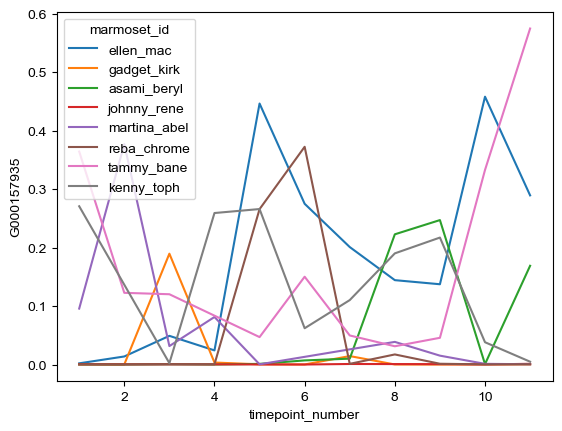

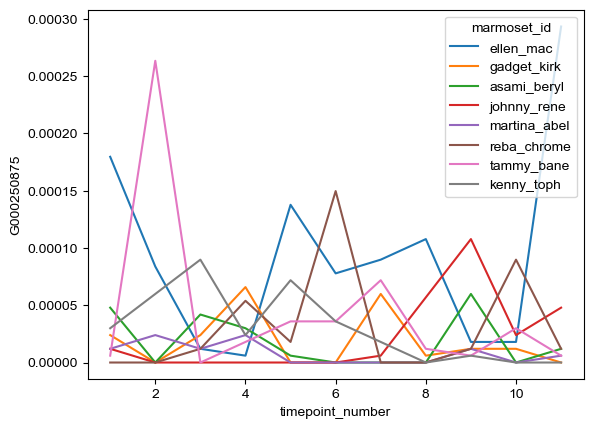

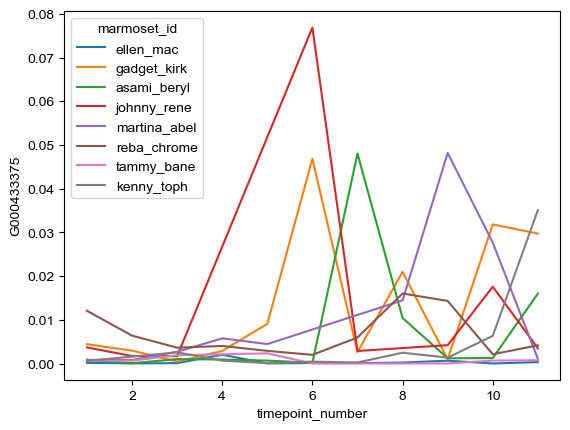

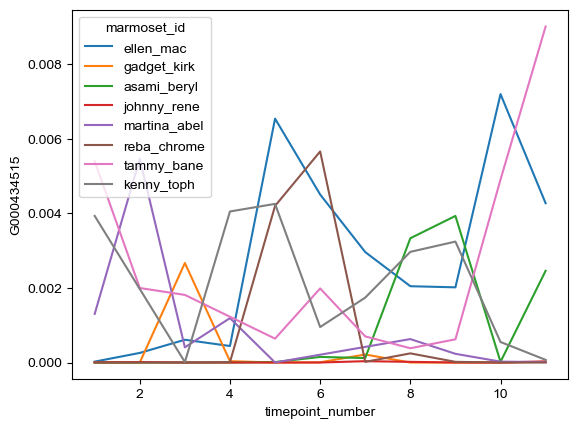

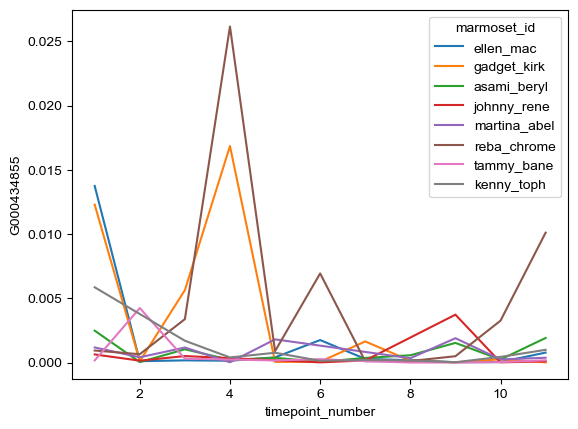

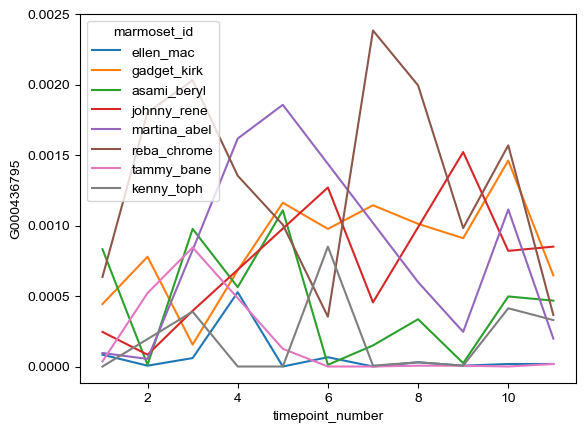

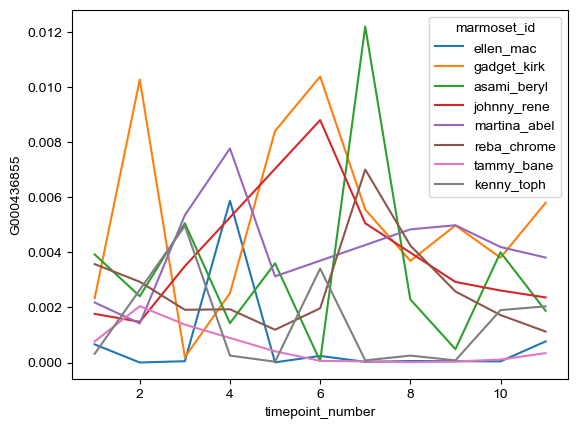

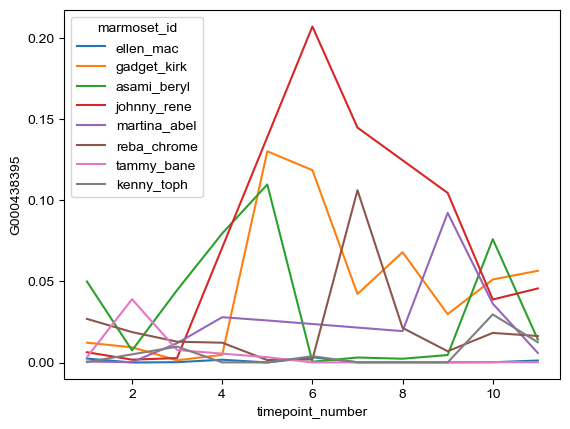

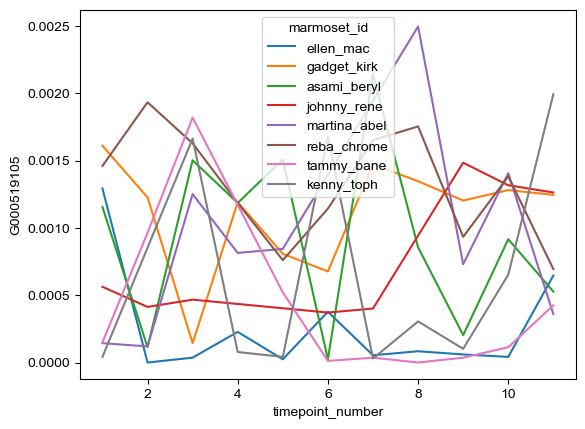

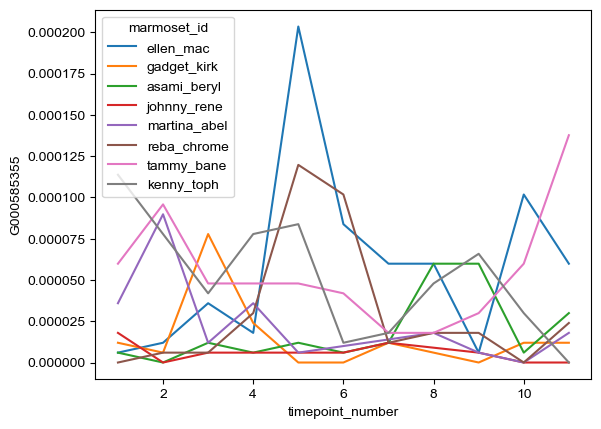

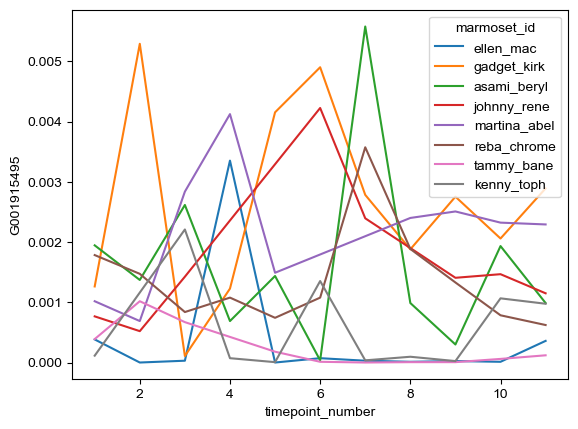

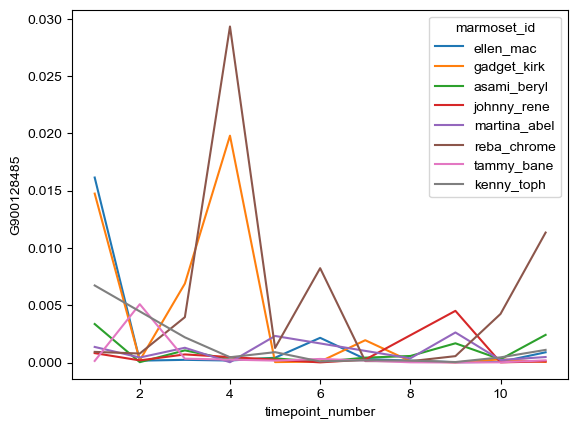

In [222]:
for OGU in OGU_list:
    sns.lineplot(data=lme_table, x='timepoint_number', y=OGU, hue='marmoset_id',
            ci=None)
    plt.show()

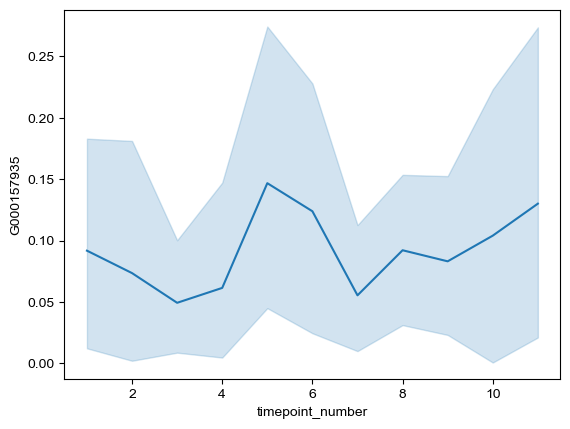

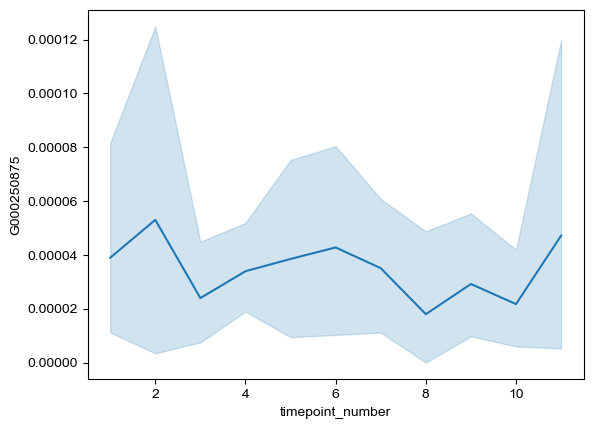

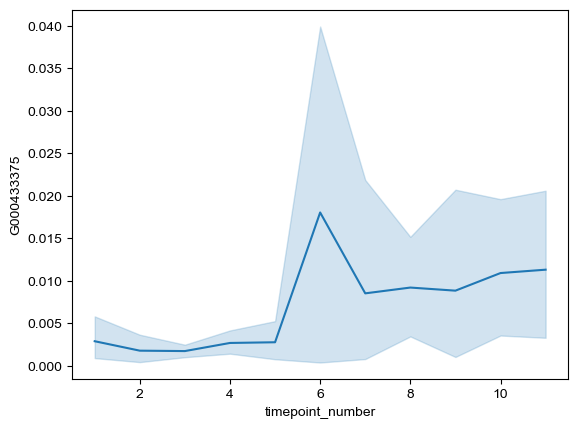

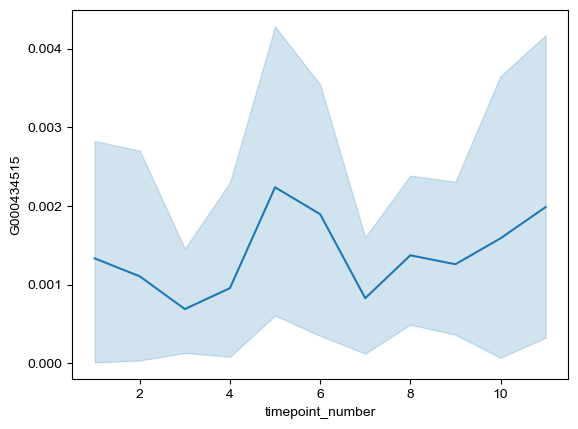

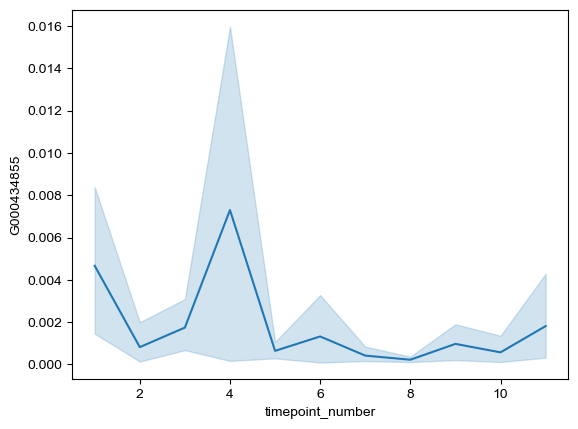

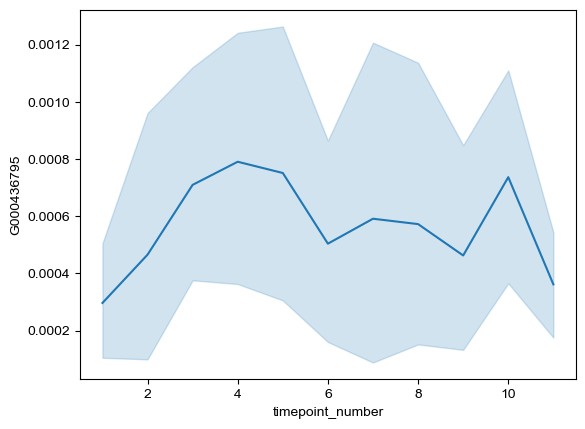

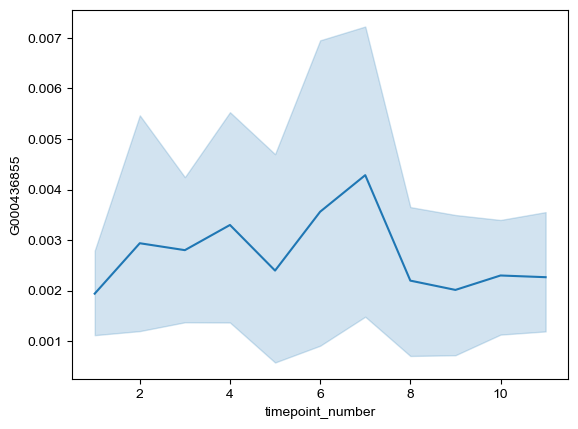

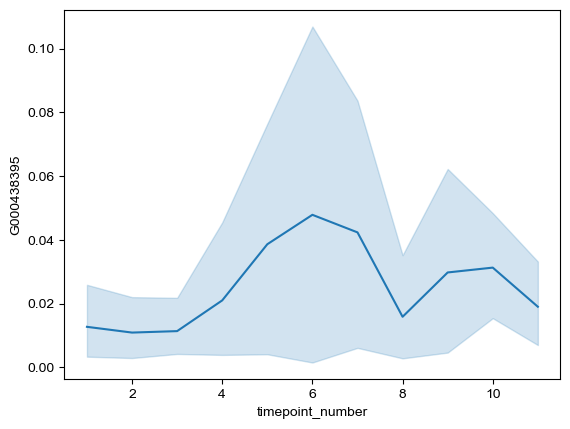

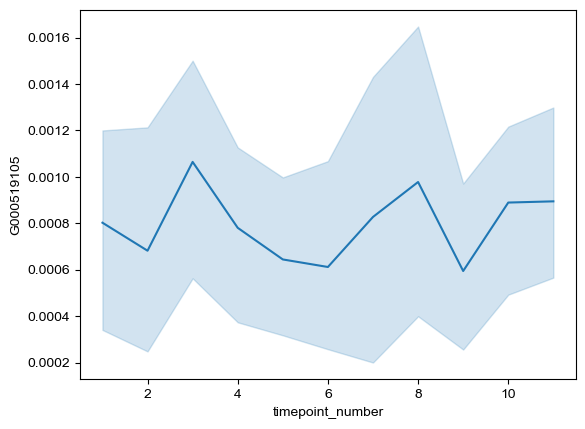

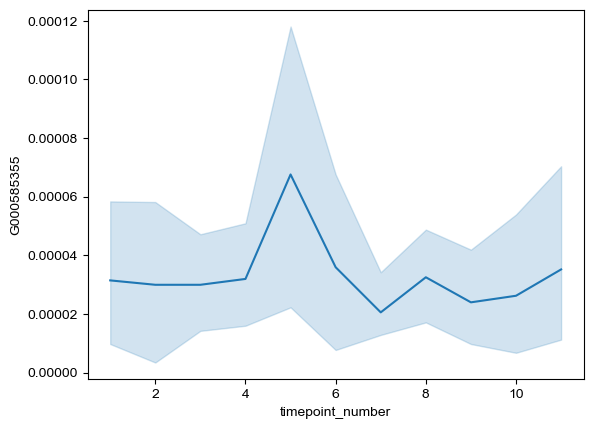

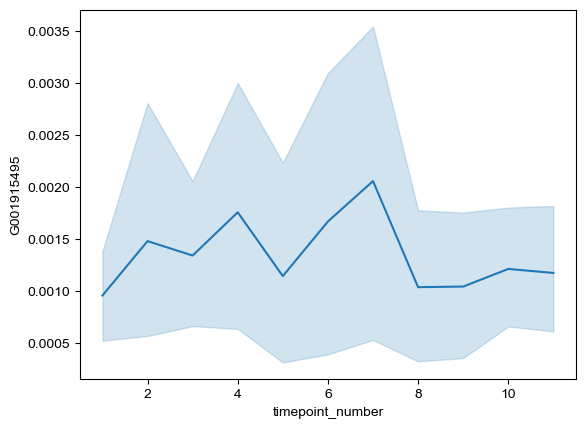

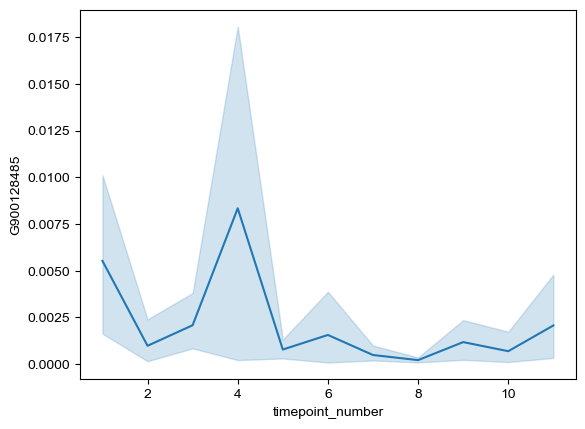

In [225]:
for OGU in OGU_list:
    sns.lineplot(data=lme_table, x='timepoint_number', y=OGU, ci=95)
    plt.show()

In [202]:
lme_table_noT = lme_table[lme_table['timepoint_number']!=5].copy()
lme_table_noT.shape

(74, 66)

In [205]:
model = smf.mixedlm("G000157935 ~ timepoint_number + C(diet, Treatment('pellet'))+ C(Pre_Post, Treatment('Pre'))",
                    lme_table_noT, groups='marmoset_id').fit()
model.summary()
#G000157935, G000250875, G000433375, G000434855, G000436795, G000436855 
#nothing working, no correlations to be found, "LinAlgError: Singular matrix"

LinAlgError: Singular matrix

In [206]:
model = smf.mixedlm("G000157935 ~ timepoint_number + C(marmoset_id)+ C(diet)",
                    lme_table_noT, groups='Pre_Post').fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:                    MixedLM       Dependent Variable:       G000157935
No. Observations:         74            Method:                   REML      
No. Groups:               2             Scale:                    0.0144    
Min. group size:          29            Log-Likelihood:           30.6827   
Max. group size:          45            Converged:                Yes       
Mean group size:          37.0                                              
----------------------------------------------------------------------------
                               Coef.    Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                       0.074       0.151  0.488 0.626 -0.223  0.371
C(marmoset_id)[T.ellen_mac]     0.074       0.060  1.240 0.215 -0.043  0.192
C(marmoset_id)[T.gadget_kirk]  -0.064       0.060 -1.070 0.285 -0.182  0.053
C(marmoset_id)[T.johnny_rene]  -0.067       0.057 -1.168 0.243 -0.178  0.045
C(marmoset_id)[T.kenny_toph]    0.042       0.061  0.696 0.487 -0.077  0.162
C(marmoset_id)[T.martina_abel] -0.005       0.064 -0.071 0.943 -0.130  0.121
C(marmoset_id)[T.reba_chrome]  -0.046       0.060 -0.761 0.447 -0.163  0.072
C(marmoset_id)[T.tammy_bane]    0.114       0.061  1.865 0.062 -0.006  0.233
C(diet)[T.gelandpellet]        -0.049       0.189 -0.262 0.794 -0.420  0.321
C(diet)[T.pellet]              -0.001       0.183 -0.007 0.995 -0.359  0.357
timepoint_number                0.002       0.009  0.203 0.839 -0.017  0.020
Pre_Post Var                    0.014 5097634.280                           
============================================================================

"""

In [208]:
model = smf.mixedlm("G000157935 ~ C(marmoset_id)",
                    lme_table_noT, groups='Pre_Post').fit()
model.summary()

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the p

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:                   MixedLM      Dependent Variable:      G000157935
No. Observations:        74           Method:                  REML      
No. Groups:              2            Scale:                   0.0139    
Min. group size:         29           Log-Likelihood:          inf       
Max. group size:         45           Converged:               Yes       
Mean group size:         37.0                                            
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.000                                    
C(marmoset_id)[T.ellen_mac]     0.094    0.053  1.777 0.075 -0.010  0.197
C(marmoset_id)[T.gadget_kirk]  -0.045    0.053 -0.852 0.394 -0.148  0.058
C(marmoset_id)[T.johnny_rene]  -0.066    0.056 -1.179 0.239 -0.175  0.044
C(marmoset_id)[T.kenny_toph]    0.061    0.054  1.124 0.261 -0.045  0.167
C(marmoset_id)[T.martina_abel]  0.017    0.056  0.302 0.763 -0.093  0.127
C(marmoset_id)[T.reba_chrome]  -0.026    0.053 -0.500 0.617 -0.130  0.077
C(marmoset_id)[T.tammy_bane]    0.132    0.054  2.431 0.015  0.026  0.238
Pre_Post Var                    0.000                                    
=========================================================================

"""

In [216]:
for OGU in OGU_list:
    model = smf.mixedlm("%s ~ C(marmoset_id)" % OGU,
                    lme_table_noT, groups='Pre_Post').fit()
    print(model.summary())

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the p

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      G000157935
No. Observations:        74           Method:                  REML      
No. Groups:              2            Scale:                   0.0139    
Min. group size:         29           Log-Likelihood:          inf       
Max. group size:         45           Converged:               Yes       
Mean group size:         37.0                                            
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.000                                    
C(marmoset_id)[T.ellen_mac]     0.094    0.053  1.777 0.075 -0.010  0.197
C(marmoset_id)[T.gadget_kirk]  -0.045    0.053 -0.852 0.394 -0.148  0.058
C(marmoset_id)[T.johnny_rene]  -0.066    0.056 -1.179 0.

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood o

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      G000434515
No. Observations:        74           Method:                  REML      
No. Groups:              2            Scale:                   0.0000    
Min. group size:         29           Log-Likelihood:          313.9916  
Max. group size:         45           Converged:               No        
Mean group size:         37.0                                            
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.001    0.001  1.684 0.092 -0.000  0.002
C(marmoset_id)[T.ellen_mac]     0.001    0.001  1.768 0.077 -0.000  0.003
C(marmoset_id)[T.gadget_kirk]  -0.001    0.001 -0.872 0.383 -0.002  0.001
C(marmoset_id)[T.johnny_rene]  -0.001    0.001 -1.155 0.

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the p

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      G000436855
No. Observations:        74           Method:                  REML      
No. Groups:              2            Scale:                   0.0000    
Min. group size:         29           Log-Likelihood:          inf       
Max. group size:         45           Converged:               Yes       
Mean group size:         37.0                                            
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.000                                    
C(marmoset_id)[T.ellen_mac]    -0.003    0.001 -2.495 0.013 -0.005 -0.001
C(marmoset_id)[T.gadget_kirk]   0.002    0.001  1.520 0.129 -0.000  0.004
C(marmoset_id)[T.johnny_rene]   0.000    0.001  0.168 0.

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the p

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      G000585355
No. Observations:        74           Method:                  REML      
No. Groups:              2            Scale:                   0.0000    
Min. group size:         29           Log-Likelihood:          inf       
Max. group size:         45           Converged:               Yes       
Mean group size:         37.0                                            
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.000                                    
C(marmoset_id)[T.ellen_mac]     0.000    0.000  1.886 0.059 -0.000  0.000
C(marmoset_id)[T.gadget_kirk]  -0.000    0.000 -0.276 0.782 -0.000  0.000
C(marmoset_id)[T.johnny_rene]  -0.000    0.000 -0.992 0.

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the p

In [223]:
lme_table_TB = lme_table[lme_table['marmoset_id']=='tammy_bane']
lme_table_TB.head(2)

G000157935  G000250875  G000433375  G000434515  G000434855  \
14577.TB.TP1    0.364449    0.000006    0.000647    0.005401    0.000168   
14577.TB.TP2    0.122719    0.000263    0.000647    0.002000    0.004246   

              G000436795  G000436855  G000438395  G000519105  G000585355  ...  \
14577.TB.TP1    0.000036    0.000766    0.003269    0.000150    0.000060  ...   
14577.TB.TP2    0.000521    0.002048    0.039000    0.000964    0.000096  ...   

                    scientific_name            sex sex_of_pair         site  \
14577.TB.TP1  marmosetgutmetagenome  notapplicable          MF  EliottField   
14577.TB.TP2  marmosetgutmetagenome  notapplicable          MF  EliottField   

              taxon_id           time_collected timepoint_group  \
14577.TB.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.TB.TP2   1441288  lightsontonoon(ZT0-ZT6)             TP2   

                                              title    tube_id  \
14577.TB.TP1  MarmosetDietChange-ACPResidentProject  363243244   
14577.TB.TP2  MarmosetDietChange-ACPResidentProject  363243247   

              timepoint_number  
14577.TB.TP1                 1  
14577.TB.TP2                 2  

[2 rows x 66 columns]

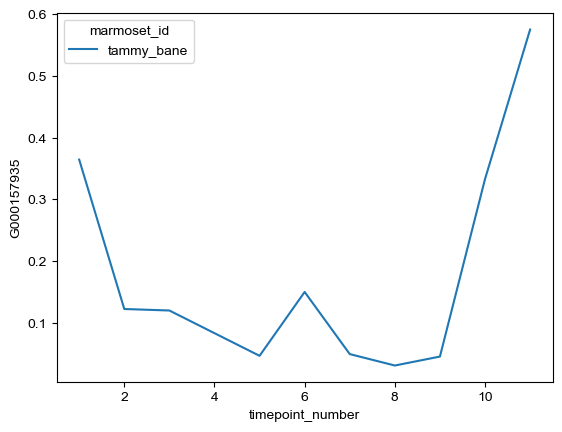

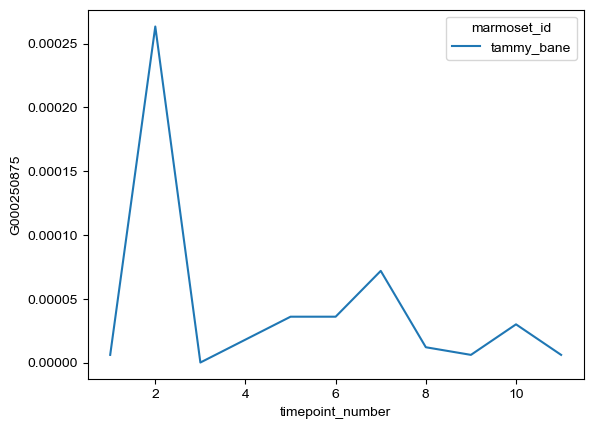

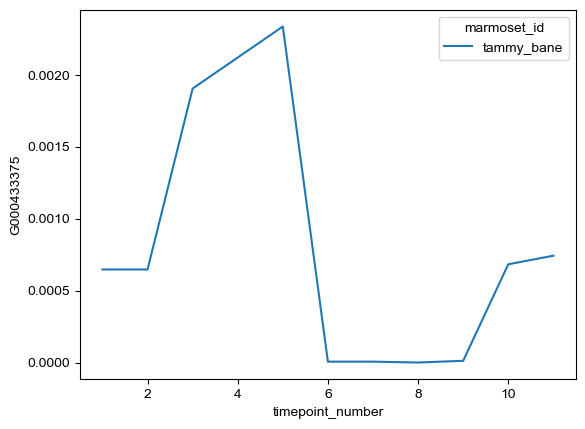

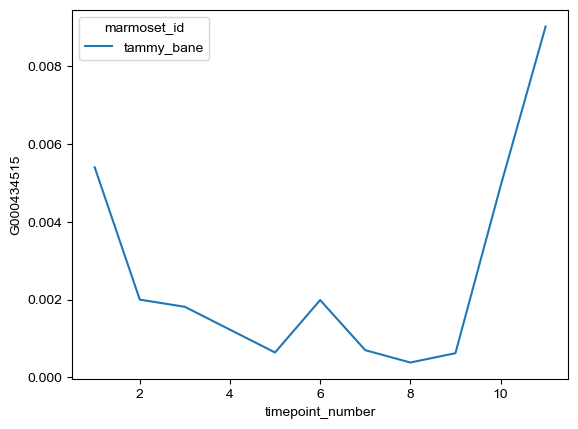

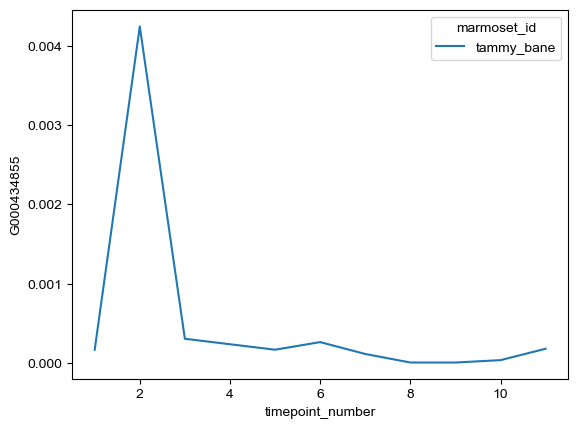

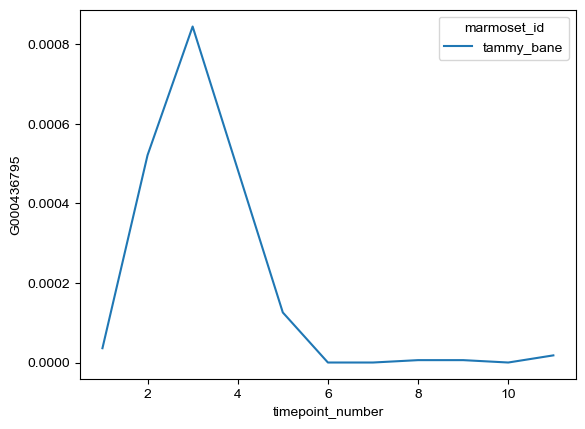

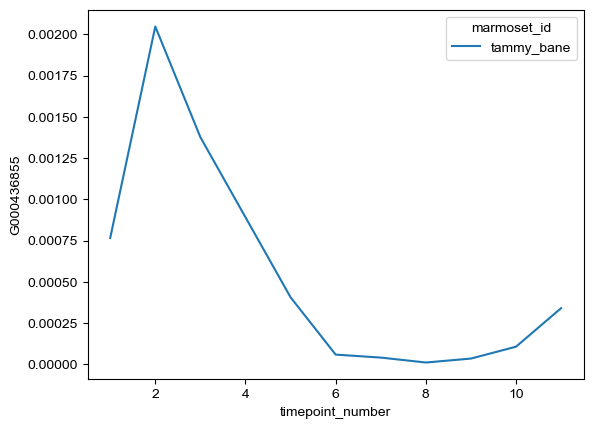

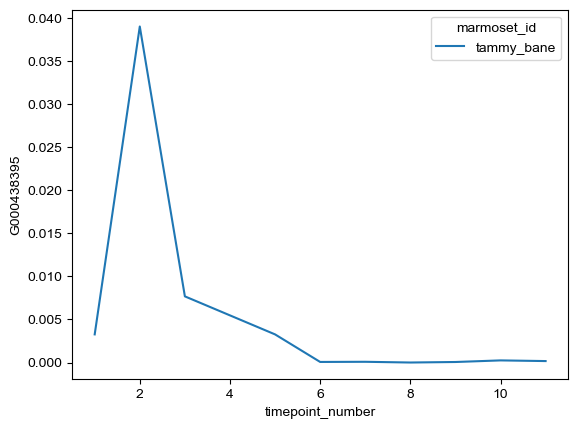

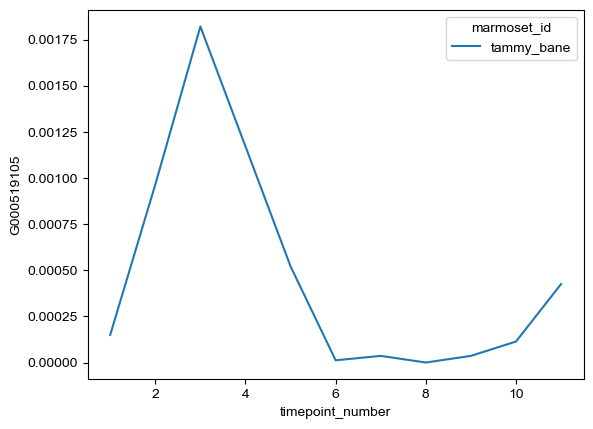

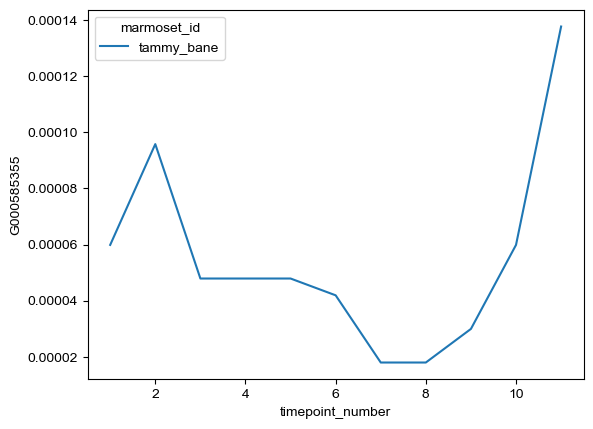

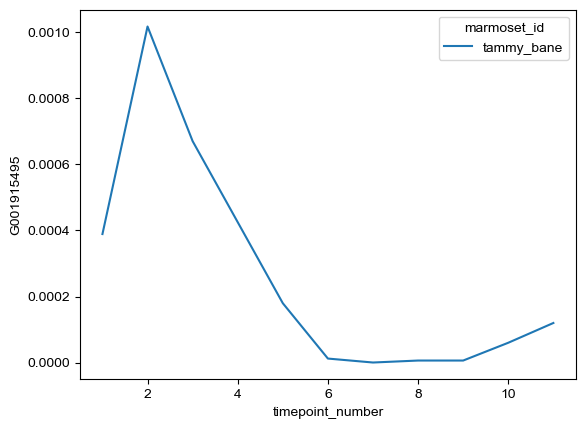

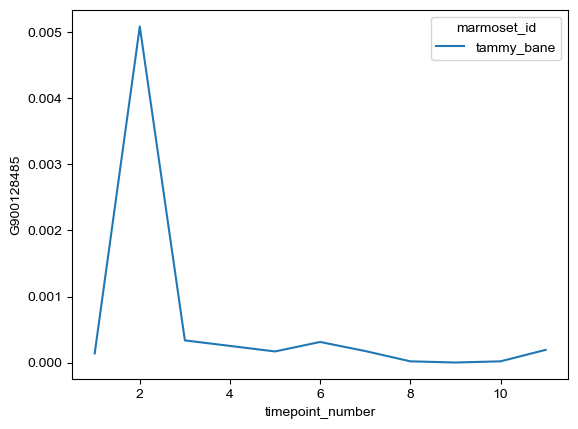

In [224]:
for OGU in OGU_list:
    sns.lineplot(data=lme_table_TB, x='timepoint_number', y=OGU, hue='marmoset_id',
            ci=None)
    plt.show()

In [196]:
lme_table_TB5 = lme_table_TB[lme_table_TB['timepoint_number']!='5']
lme_table_TB5.shape

(9, 66)

In [197]:
lme_table_TB5['Pre_Post']

14577.TB.TP1      Pre
14577.TB.TP2      Pre
14577.TB.TP3      Pre
14577.TB.TP9     Post
14577.TB.TP7     Post
14577.TB.TP11    Post
14577.TB.TP6     Post
14577.TB.TP8     Post
14577.TB.TP10    Post
Name: Pre_Post, dtype: object

In [199]:
model = smf.mixedlm("G000157935 ~ C(diet, Treatment('pellet'))",
                    lme_table_TB5, groups='Pre_Post').fit()
model.summary()

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                    MixedLM        Dependent Variable:        G000157935
No. Observations:         9              Method:                    REML      
No. Groups:               2              Scale:                     0.0393    
Min. group size:          3              Log-Likelihood:            -0.0483   
Max. group size:          6              Converged:                 Yes       
Mean group size:          4.5                                                 
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            0.202    0.221  0.916 0.360 -0.231  0.636
C(diet, Treatment('pellet'))[T.gel] -0.005    0.276 -0.018 0.986 -0.547  0.537
Pre_Post Var                         0.039                                    
==============================================================================

"""

In [ ]:
##Check Assumptions of Normality using Residuals
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [ ]:
##Check Assumptions of Normality using Q-Q plot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

In [ ]:
#Test for normality
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

# Tammy and Bane

In [79]:
!qiime feature-table filter-samples \
            --i-table ../data/Microbiome/pool_filtered_pergenome/3000_filt_ft.qza \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-where "[marmoset_id]='tammy_bane'" \
            --o-filtered-table ../data/Microbiome/pool_filtered_pergenome/filt_ft_TB.qza

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_ft_TB.qza


In [80]:
!qiime diversity core-metrics-phylogenetic \
    --i-table ../data/Microbiome/pool_filtered_pergenome/filt_ft_TB.qza \
    --i-phylogeny ../../shotgun_scripts/woltka_v2_rooted_tree.qza \
    --p-sampling-depth 167000 \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --output-dir ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/evenness_vector.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered/filt_167000rar_core_diversity/tammy_and_bane/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: ../data/Microb

In [82]:
!qiime emperor plot \
    --i-pcoa ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/weighted_unifrac_pcoa_results.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --p-custom-axes timepoint_number \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/wUF_emp_timepoint.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/wUF_emp_timepoint.qzv


In [83]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/weighted_unifrac_distance_matrix.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column Pre_Post \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/wUF_PrePost_bsig.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/wUF_PrePost_bsig.qzv


In [84]:
!qiime diversity alpha-group-significance \
    --i-alpha-diversity ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/observed_features_vector.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/observed_features_asig.qzv

!qiime diversity alpha-group-significance \
    --i-alpha-diversity ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_asig.qzv

!qiime diversity alpha-group-significance \
    --i-alpha-diversity ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/faith_pd_vector.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/faith_pd_asig.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/observed_features_asig.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_asig.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/faith_pd_asig.qzv


In [140]:
!qiime tools export \
    --input-path ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector.qza \
    --output-path ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector

Exported ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector.qza as AlphaDiversityDirectoryFormat to directory ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector


#### RPCA

In [85]:
!qiime emperor biplot \
    --i-biplot ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_ordination.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-feature-metadata-file ../../shotgun_scripts/woltka_v2_taxonomy.qza \
    --p-number-of-features 10 \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_biplot.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_biplot.qzv


In [86]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_distance.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column Pre_Post \
    --p-method permanova \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_PrePost_bsig.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_PrePost_bsig.qzv


In [87]:
!qiime qurro loading-plot \
    --i-ranks ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_ordination.qza \
    --i-table ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_all.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-feature-metadata-file ../../shotgun_scripts/woltka_v2_taxonomy.qza \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_qurro_plot.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_RPCA_all_qurro_plot.qzv


In [ ]:
# import log-ratio data
metadata_one = pd.read_csv('../data/Microbiome/14577_fixed.txt',
                           sep='\t', index_col=0)
# import rest of the metadata from qurro outputs
metadata_two = pd.read_csv('../data/Microbiome/pool_filtered/RPCA/RPCA_qurro_lr_cllitrichos.copri.reuteri_Ecoli.Bfinegolii.Bstercoris.Pmassiliensis.tsv',
                           sep='\t', index_col=0)[['Current_Natural_Log_Ratio']]
# merge the data
log_ratio_metdata = pd.concat([metadata_two, metadata_one], axis=1)
# ensure no duplicate columns
log_ratio_metdata = log_ratio_metdata.dropna(subset=['Current_Natural_Log_Ratio'])
# export in QIIME2 format
log_ratio_metdata.index.name = '#SampleID'
log_ratio_metdata.to_csv('../data/Microbiome/pool_filtered/RPCA/merged_6species_lr.tsv', sep='\t')

In [ ]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Microbiome/pool_filtered/RPCA/merged_4genera_lr.tsv \
    --p-state-column timepoint_number \
    --p-individual-id-column host_subject_id \
    --p-default-group-column collection_timepoint \
    --p-default-metric Current_Natural_Log_Ratio \
    --o-visualization ../data/Microbiome/pool_filtered/RPCA/fourgenera_lr_volatility_plot.qzv
#metric must be numerical

#### phylo-RPCA

In [88]:
!qiime gemelli phylogenetic-rpca-with-taxonomy \
    --i-table ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/tammy_bane_all.qza \
    --i-phylogeny ../../shotgun_scripts/woltka_v2_rooted_tree.qza \
    --m-taxonomy-file ../../shotgun_scripts/woltka_v2_taxonomy.qza \
    --o-biplot ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-ordination.qza \
    --o-distance-matrix ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-distance.qza \
    --o-counts-by-node-tree ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-tree.qza \
    --o-counts-by-node ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-table.qza \
    --o-t2t-taxonomy ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-taxonomy.qza

Saved PCoAResults % Properties('biplot') to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-ordination.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-distance.qza
Saved Phylogeny[Rooted] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-tree.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-table.qza
Saved FeatureData[Taxonomy] to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-taxonomy.qza


In [89]:
!qiime empress community-plot\
    --i-tree ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-tree.qza \
    --i-feature-table ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-table.qza \
    --i-pcoa ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-ordination.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-feature-metadata-file ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-taxonomy.qza \
    --p-filter-missing-features \
    --p-number-of-features 10 \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-empress.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-empress.qzv


In [91]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-distance.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column Pre_Post \
    --p-method permanova \
    --o-visualization ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-PrePost_bsig.qzv

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/indvRPCA/tammy_bane_all/TB_phyloRPCA-PrePost_bsig.qzv


### Additional Plots

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
from statannotations.Annotator import Annotator

In [115]:
metadata = pd.read_csv('../data/Microbiome/14577_fixed.txt', sep='\t', index_col=0)
metadata.head()

Pre_Post collection_timepoint   keep collection_timestamp  \
sample_name                                                               
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   

              date_collected  description          diet  elevation  \
sample_name                                                          
14577.AB.TP1          6/2/21          NaN  gelandpellet        193   
14577.AB.TP10        4/14/22          NaN           gel        193   
14577.AB.TP11        7/11/22          NaN           gel        193   
14577.AB.TP2          6/3/21          NaN  gelandpellet        193   
14577.AB.TP3          6/8/21          NaN  gelandpellet        193   

              elevation_units           empo_1  ...    scientific_name  \
sample_name                                     ...                      
14577.AB.TP1           meters  Host-associated  ...  primatemetagenome   
14577.AB.TP10          meters  Host-associated  ...  primatemetagenome   
14577.AB.TP11          meters  Host-associated  ...  primatemetagenome   
14577.AB.TP2           meters  Host-associated  ...  primatemetagenome   
14577.AB.TP3           meters  Host-associated  ...  primatemetagenome   

                         sex sex_of_pair         site taxon_id  \
sample_name                                                      
14577.AB.TP1   notapplicable          MF  EliottField  1441288   
14577.AB.TP10  notapplicable          MF  EliottField  1441288   
14577.AB.TP11  notapplicable          MF  EliottField  1441288   
14577.AB.TP2   notapplicable          MF  EliottField  1441288   
14577.AB.TP3   notapplicable          MF  EliottField  1441288   

                        time_collected timepoint_group  \
sample_name                                              
14577.AB.TP1   lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP10  lightsontonoon(ZT0-ZT6)            TP10   
14577.AB.TP11  lightsontonoon(ZT0-ZT6)            TP11   
14577.AB.TP2   lightsontonoon(ZT0-ZT6)             TP2   
14577.AB.TP3   lightsontonoon(ZT0-ZT6)             TP3   

                                               title    tube_id  \
sample_name                                                       
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.AB.TP10  MarmosetDietChange-ACPResidentProject  363243336   
14577.AB.TP11  MarmosetDietChange-ACPResidentProject  363243344   
14577.AB.TP2   MarmosetDietChange-ACPResidentProject  363243257   
14577.AB.TP3   MarmosetDietChange-ACPResidentProject  363243266   

              timepoint_number  
sample_name                     
14577.AB.TP1                 1  
14577.AB.TP10               10  
14577.AB.TP11               11  
14577.AB.TP2                 2  
14577.AB.TP3                 3  

[5 rows x 54 columns]

#### Shannon

In [141]:
shannon = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/tammy_and_bane/shannon_vector/alpha-diversity.tsv',
                     sep='\t', index_col=0)
shannon.head()

shannon_entropy
14577.TB.TP1         4.469364
14577.TB.TP2         5.637940
14577.TB.TP3         4.697399
14577.TB.TP9         3.295744
14577.TB.TP7         3.720811

In [142]:
shannon_md = pd.merge(shannon, metadata, left_index=True, right_index=True)
shannon_md.head()

shannon_entropy Pre_Post collection_timepoint  keep  \
14577.TB.TP1         4.469364      Pre                  Pre  True   
14577.TB.TP2         5.637940      Pre                  Pre  True   
14577.TB.TP3         4.697399      Pre                  Pre  True   
14577.TB.TP9         3.295744     Post                 Post  True   
14577.TB.TP7         3.720811     Post                 Post  True   

             collection_timestamp date_collected  description    diet  \
14577.TB.TP1   6/2/202112:00:00PM         6/2/21          NaN  pellet   
14577.TB.TP2   6/3/202112:00:00PM         6/3/21          NaN  pellet   
14577.TB.TP3   6/8/202112:00:00PM         6/8/21          NaN  pellet   
14577.TB.TP9  7/19/202112:00:00PM        7/19/21          NaN     gel   
14577.TB.TP7   7/2/202112:00:00PM         7/2/21          NaN     gel   

              elevation elevation_units  ...        scientific_name  \
14577.TB.TP1        193          meters  ...  marmosetgutmetagenome   
14577.TB.TP2        193          meters  ...  marmosetgutmetagenome   
14577.TB.TP3        193          meters  ...  marmosetgutmetagenome   
14577.TB.TP9        193          meters  ...  marmosetgutmetagenome   
14577.TB.TP7        193          meters  ...  marmosetgutmetagenome   

                        sex sex_of_pair         site taxon_id  \
14577.TB.TP1  notapplicable          MF  EliottField  1441288   
14577.TB.TP2  notapplicable          MF  EliottField  1441288   
14577.TB.TP3  notapplicable          MF  EliottField  1441288   
14577.TB.TP9  notapplicable          MF  EliottField  1441288   
14577.TB.TP7  notapplicable          MF  EliottField  1441288   

                       time_collected timepoint_group  \
14577.TB.TP1  lightsontonoon(ZT0-ZT6)             TP1   
14577.TB.TP2  lightsontonoon(ZT0-ZT6)             TP2   
14577.TB.TP3  lightsontonoon(ZT0-ZT6)             TP3   
14577.TB.TP9  lightsontonoon(ZT0-ZT6)             TP9   
14577.TB.TP7  lightsontonoon(ZT0-ZT6)             TP7   

                                              title    tube_id  \
14577.TB.TP1  MarmosetDietChange-ACPResidentProject  363243244   
14577.TB.TP2  MarmosetDietChange-ACPResidentProject  363243247   
14577.TB.TP3  MarmosetDietChange-ACPResidentProject  363243253   
14577.TB.TP9  MarmosetDietChange-ACPResidentProject  363243317   
14577.TB.TP7  MarmosetDietChange-ACPResidentProject  363243313   

             timepoint_number  
14577.TB.TP1                1  
14577.TB.TP2                2  
14577.TB.TP3                3  
14577.TB.TP9                9  
14577.TB.TP7                7  

[5 rows x 55 columns]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pre vs. Post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.381e-02 U_stat=1.800e+01


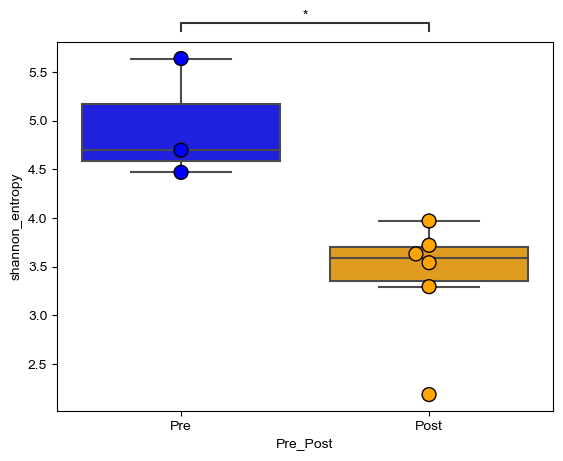

In [146]:
g = sns.boxplot(data=shannon_md, x='Pre_Post', y='shannon_entropy', 
                palette=['blue', 'orange'])
g = sns.swarmplot(data=shannon_md, x='Pre_Post', y='shannon_entropy', 
                s=10, edgecolor='k', linewidth=1,
             palette=['blue', 'orange'], dodge=True)

annotator = Annotator(g, data=shannon_md, x='Pre_Post', y='shannon_entropy', 
                pairs=[ ('Pre', 'Post')])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_and_annotate()

plt.rcParams['svg.fonttype'] = 'none' #makes text editable in inkscape
plt.savefig('../figures/shannon_prepost.svg', dpi=150, bbox_inches='tight')

#### Log Ratios

In [96]:
Attempt1 = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/sample_plot_data_Akk_v_all4overlap.tsv', sep='\t')
Attempt1.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number group  \
0  14577.EM.TP1                        NaN                 1   Pre   
1  14577.GK.TP1                  -5.717028                 1   Pre   
2  14577.AB.TP1                  -5.488938                 1   Pre   
3  14577.JR.TP1                  -2.172619                 1   Pre   
4  14577.MA.TP1                  -5.679319                 1   Pre   

    marmoset_id  
0     ellen_mac  
1   gadget_kirk  
2   asami_beryl  
3   johnny_rene  
4  martina_abel

In [124]:
Attempt1_TB = Attempt1[Attempt1['marmoset_id']=='tammy_bane'].copy()
Attempt1_TB["LnLR_type"] = 'Attempt1-Akk_v_all4overlap'
Attempt1_TB.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number       group  \
6   14577.TB.TP1                  -8.027313                 1         Pre   
11  14577.TB.TP2                        NaN                 2         Pre   
16  14577.TB.TP3                  -5.904817                 3         Pre   
35  14577.TB.TP5                  -3.324236                 5  Transition   
38  14577.TB.TP6                        NaN                 6        Post   

   marmoset_id                   LnLR_type  
6   tammy_bane  Attempt1-Akk_v_all4overlap  
11  tammy_bane  Attempt1-Akk_v_all4overlap  
16  tammy_bane  Attempt1-Akk_v_all4overlap  
35  tammy_bane  Attempt1-Akk_v_all4overlap  
38  tammy_bane  Attempt1-Akk_v_all4overlap

In [103]:
Attempt2 = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/sample_plot_data_1v4overlap.tsv', sep='\t')
Attempt2.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number group  \
0  14577.EM.TP1                   1.867520                 1   Pre   
1  14577.GK.TP1                   3.416029                 1   Pre   
2  14577.AB.TP1                   2.988812                 1   Pre   
3  14577.JR.TP1                   3.667218                 1   Pre   
4  14577.MA.TP1                  -2.415728                 1   Pre   

    marmoset_id  
0     ellen_mac  
1   gadget_kirk  
2   asami_beryl  
3   johnny_rene  
4  martina_abel

In [125]:
Attempt2_TB = Attempt2[Attempt2['marmoset_id']=='tammy_bane'].copy()
Attempt2_TB["LnLR_type"] = 'Attempt2-1v4overlap'
Attempt2_TB.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number       group  \
6   14577.TB.TP1                  -3.425764                 1         Pre   
11  14577.TB.TP2                  -0.830547                 2         Pre   
16  14577.TB.TP3                   0.028355                 3         Pre   
35  14577.TB.TP5                  -0.438913                 5  Transition   
38  14577.TB.TP6                  -5.271289                 6        Post   

   marmoset_id            LnLR_type  
6   tammy_bane  Attempt2-1v4overlap  
11  tammy_bane  Attempt2-1v4overlap  
16  tammy_bane  Attempt2-1v4overlap  
35  tammy_bane  Attempt2-1v4overlap  
38  tammy_bane  Attempt2-1v4overlap

In [100]:
Attempt3 = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/sample_plot_data_top5overlap_bothBacteroides.tsv', sep='\t')
Attempt3.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number group  \
0  14577.EM.TP1                   2.731242                 1   Pre   
1  14577.GK.TP1                   5.168162                 1   Pre   
2  14577.AB.TP1                   5.146233                 1   Pre   
3  14577.JR.TP1                   3.304995                 1   Pre   
4  14577.MA.TP1                  -2.560153                 1   Pre   

    marmoset_id  
0     ellen_mac  
1   gadget_kirk  
2   asami_beryl  
3   johnny_rene  
4  martina_abel

In [126]:
Attempt3_TB = Attempt3[Attempt3['marmoset_id']=='tammy_bane'].copy()
Attempt3_TB["LnLR_type"] = 'Attempt3-top5overlap_bothBacteroides'
Attempt3_TB.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number       group  \
6   14577.TB.TP1                  -4.215142                 1         Pre   
11  14577.TB.TP2                  -0.866227                 2         Pre   
16  14577.TB.TP3                  -2.124829                 3         Pre   
35  14577.TB.TP5                  -1.910477                 5  Transition   
38  14577.TB.TP6                  -5.243828                 6        Post   

   marmoset_id                             LnLR_type  
6   tammy_bane  Attempt3-top5overlap_bothBacteroides  
11  tammy_bane  Attempt3-top5overlap_bothBacteroides  
16  tammy_bane  Attempt3-top5overlap_bothBacteroides  
35  tammy_bane  Attempt3-top5overlap_bothBacteroides  
38  tammy_bane  Attempt3-top5overlap_bothBacteroides

In [127]:
TBlogratios = pd.concat([Attempt1_TB, Attempt2_TB, Attempt3_TB])
TBlogratios.head()

Sample ID  Current_Natural_Log_Ratio  timepoint_number       group  \
6   14577.TB.TP1                  -8.027313                 1         Pre   
11  14577.TB.TP2                        NaN                 2         Pre   
16  14577.TB.TP3                  -5.904817                 3         Pre   
35  14577.TB.TP5                  -3.324236                 5  Transition   
38  14577.TB.TP6                        NaN                 6        Post   

   marmoset_id                   LnLR_type  
6   tammy_bane  Attempt1-Akk_v_all4overlap  
11  tammy_bane  Attempt1-Akk_v_all4overlap  
16  tammy_bane  Attempt1-Akk_v_all4overlap  
35  tammy_bane  Attempt1-Akk_v_all4overlap  
38  tammy_bane  Attempt1-Akk_v_all4overlap

In [128]:
TBlogratios['tp_group'] = TBlogratios['timepoint_number'].astype(str)+"_"+TBlogratios['group'].astype(str)
TBlogratios2 = TBlogratios.drop(columns=['timepoint_number', 'group', 'marmoset_id'])
TBlogratios2.set_index('Sample ID', inplace=True)
TBlogratios2.head()

Current_Natural_Log_Ratio                   LnLR_type  \
Sample ID                                                             
14577.TB.TP1                  -8.027313  Attempt1-Akk_v_all4overlap   
14577.TB.TP2                        NaN  Attempt1-Akk_v_all4overlap   
14577.TB.TP3                  -5.904817  Attempt1-Akk_v_all4overlap   
14577.TB.TP5                  -3.324236  Attempt1-Akk_v_all4overlap   
14577.TB.TP6                        NaN  Attempt1-Akk_v_all4overlap   

                  tp_group  
Sample ID                   
14577.TB.TP1         1_Pre  
14577.TB.TP2         2_Pre  
14577.TB.TP3         3_Pre  
14577.TB.TP5  5_Transition  
14577.TB.TP6        6_Post

In [129]:
TBlogratios_md = pd.merge(TBlogratios2, metadata, left_index=True, right_index=True)
TBlogratios_md.head()

Current_Natural_Log_Ratio  \
14577.TB.TP1                   -8.027313   
14577.TB.TP1                   -3.425764   
14577.TB.TP1                   -4.215142   
14577.TB.TP10                  -6.648985   
14577.TB.TP10                  -3.805604   

                                          LnLR_type tp_group Pre_Post  \
14577.TB.TP1             Attempt1-Akk_v_all4overlap    1_Pre      Pre   
14577.TB.TP1                    Attempt2-1v4overlap    1_Pre      Pre   
14577.TB.TP1   Attempt3-top5overlap_bothBacteroides    1_Pre      Pre   
14577.TB.TP10            Attempt1-Akk_v_all4overlap  10_LTFU     Post   
14577.TB.TP10                   Attempt2-1v4overlap  10_LTFU     Post   

              collection_timepoint   keep collection_timestamp date_collected  \
14577.TB.TP1                   Pre   True   6/2/202112:00:00PM         6/2/21   
14577.TB.TP1                   Pre   True   6/2/202112:00:00PM         6/2/21   
14577.TB.TP1                   Pre   True   6/2/202112:00:00PM         6/2/21   
14577.TB.TP10                 LTFU  False  4/14/202212:00:00PM        4/14/22   
14577.TB.TP10                 LTFU  False  4/14/202212:00:00PM        4/14/22   

               description    diet  ...        scientific_name            sex  \
14577.TB.TP1           NaN  pellet  ...  marmosetgutmetagenome  notapplicable   
14577.TB.TP1           NaN  pellet  ...  marmosetgutmetagenome  notapplicable   
14577.TB.TP1           NaN  pellet  ...  marmosetgutmetagenome  notapplicable   
14577.TB.TP10          NaN     gel  ...  marmosetgutmetagenome  notapplicable   
14577.TB.TP10          NaN     gel  ...  marmosetgutmetagenome  notapplicable   

              sex_of_pair         site taxon_id           time_collected  \
14577.TB.TP1           MF  EliottField  1441288  lightsontonoon(ZT0-ZT6)   
14577.TB.TP1           MF  EliottField  1441288  lightsontonoon(ZT0-ZT6)   
14577.TB.TP1           MF  EliottField  1441288  lightsontonoon(ZT0-ZT6)   
14577.TB.TP10          MF  EliottField  1441288  lightsontonoon(ZT0-ZT6)   
14577.TB.TP10          MF  EliottField  1441288  lightsontonoon(ZT0-ZT6)   

              timepoint_group                                  title  \
14577.TB.TP1              TP1  MarmosetDietChange-ACPResidentProject   
14577.TB.TP1              TP1  MarmosetDietChange-ACPResidentProject   
14577.TB.TP1              TP1  MarmosetDietChange-ACPResidentProject   
14577.TB.TP10            TP10  MarmosetDietChange-ACPResidentProject   
14577.TB.TP10            TP10  MarmosetDietChange-ACPResidentProject   

                 tube_id timepoint_number  
14577.TB.TP1   363243244                1  
14577.TB.TP1   363243244                1  
14577.TB.TP1   363243244                1  
14577.TB.TP10  363243324               10  
14577.TB.TP10  363243324               10  

[5 rows x 57 columns]

In [136]:
TBlogratios_md.reset_index(inplace=True)
TBlogratios_md['timepoint_number'] = pd.to_numeric(TBlogratios_md['timepoint_number'])
TBlogratios_md.dtypes

index                         object
Current_Natural_Log_Ratio    float64
LnLR_type                     object
tp_group                      object
Pre_Post                      object
collection_timepoint          object
keep                            bool
collection_timestamp          object
date_collected                object
description                  float64
diet                          object
elevation                      int64
elevation_units               object
empo_1                        object
empo_2                        object
empo_3                        object
env_biome                     object
env_feature                   object
env_material                  object
env_package                   object
geo_loc_name                  object
health_state                  object
host_body_habitat             object
host_body_product             object
host_body_site                object
host_common_name              object
host_scientific_name          object
h

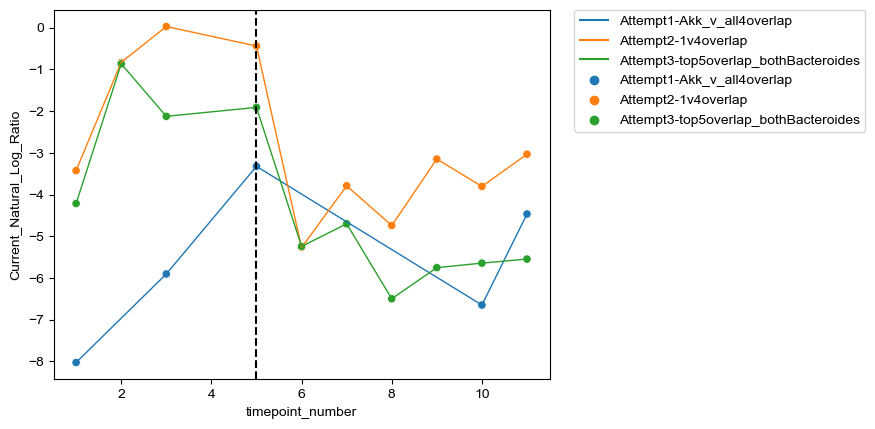

In [147]:
g = sns.lineplot(data=TBlogratios_md, 
             x='timepoint_number', y='Current_Natural_Log_Ratio', hue='LnLR_type',
                 estimator=None, lw=1)
g = sns.scatterplot(data=TBlogratios_md, 
                x='timepoint_number', y='Current_Natural_Log_Ratio', hue='LnLR_type',
                    estimator=None, lw=1)
plt.axvline(5, color='k', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/LnRatios3.svg', dpi=150, bbox_inches='tight')

# Unweighted UniFrac

In [3]:
import subprocess

In [1]:
marmoset_ids = ["asami_beryl", "ellen_mac", "gadget_kirk", "johnny_rene", 
                "martina_abel", "reba_chrome", "tammy_bane", "kenny_toph"]

In [4]:
#filter for all samples for each pair
for marmoset_id in marmoset_ids:

    # Get the output file name
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_rar-table.qza"

    # Get the subset name
    subset_select = f"[marmoset_id]=\'{marmoset_id}\'"
    subset_select2 = f"\"{subset_select}\""

    # Run the bash command
    command = """
        qiime feature-table filter-samples \
            --i-table ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/rarefied_table.qza \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-where {subset_select2} \
            --o-filtered-table {output_file_name}
    """.format(subset_select2=subset_select2, output_file_name=output_file_name)
    subprocess.run(command, shell=True)

Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/asami_beryl_rar-table.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/ellen_mac_rar-table.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/gadget_kirk_rar-table.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/johnny_rene_rar-table.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/martina_abel_rar-table.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/reba_chrome_rar-table.qza
Saved FeatureTable[Frequency] to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/tammy_bane_rar-table.qza
S

In [5]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_rar-table.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_uwUF-dm.qza"

    # Run the bash command
    command = """
        qiime diversity beta-phylogenetic \
            --i-table {input_file_name} \
            --i-phylogeny ../../shotgun_scripts/woltka_v2_rooted_tree.qza \
            --p-metric unweighted_unifrac \
            --o-distance-matrix {output_file_name}
    """.format(output_file_name=output_file_name, input_file_name=input_file_name)
    subprocess.run(command, shell=True)

Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/asami_beryl_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/ellen_mac_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/gadget_kirk_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/johnny_rene_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/martina_abel_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/reba_chrome_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/tammy_bane_uwUF-dm.qza
Saved DistanceMatrix to: ../data/Microbiome/pool_filtered_pergenome/filt_16700

In [6]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_uwUF-dm.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_uwUF-pcoa.qza"

    # Run the bash command
    command = """
        qiime diversity pcoa \
            --i-distance-matrix {input_file_name} \
            --o-pcoa {output_file_name}
    """.format(output_file_name=output_file_name, input_file_name=input_file_name)
    subprocess.run(command, shell=True)

Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/asami_beryl_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/ellen_mac_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/gadget_kirk_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/johnny_rene_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/martina_abel_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/reba_chrome_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/tammy_bane_uwUF-pcoa.qza
Saved PCoAResults to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_

In [8]:
for marmoset_id in marmoset_ids:

    # Get the output file name
    input_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_uwUF-pcoa.qza"
    output_file_name = f"../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/{marmoset_id}_uwUF-emp.qzv"

    # Run the bash command
    command = """
        qiime emperor plot \
            --i-pcoa {input_file_name} \
            --m-metadata-file ../data/Microbiome/14577_fixed.txt \
            --p-custom-axes timepoint_number \
            --o-visualization {output_file_name}
    """.format(output_file_name=output_file_name, input_file_name=input_file_name)
    subprocess.run(command, shell=True)

Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/asami_beryl_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/ellen_mac_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/gadget_kirk_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/johnny_rene_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/martina_abel_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/reba_chrome_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/indv_uwUF/tammy_bane_uwUF-emp.qzv
Saved Visualization to: ../data/Microbiome/pool_filtered_pergenome/filt_167000